# Capstone Project

### Spend Forecasting and Drift Monitoring

Submitted By: Francesca Felizardo  
IOD Cohort Feb 2025  
August 20, 2025

### A. Data Definition and Scope

Content:
1. Invoice Dataset - Contains about 5 (2021 to 2025) years of invoice spend data with description, supplier, date and category information

Source & Acknowledgements:
The observations are from real invoices captured from a Utility Energy Company in Australia

### B. Project Scope (to Capstone)

Stage 1: Invoice Classification (ML and LLMs) - Mini Project 3 Scope - Complete   

The capstone project will be a continuation of the work done in Mini Project 3. Using the final labelled data the next steps will be to forecast, monitor drift and deploy in a dashboard as per below steps.  

Stage 2: Time Series Forecasting of Spend  
Stage 3: Drift Detection and Explainability  
Stage 4: Deployment (Dashboard)

### C. Problem Statement

Understanding and predicting future spend across suppliers and categories, monitoring drift in supplier behaviour and category distributions are critical for budgeting, supplier negotiations and management and strategic planning and it is essential that these are visible and accessible to the team to ensure better and informed decision making. 


### D. Project Goal

This project aims to develop an end-to-end machine learning solution that:  

1. Forecasts future spend at multiple levels (supplier, Level 1 category, Level 2 category).  

2. Monitors data drift in supplier distributions, category proportions, invoice amounts.  

3. Provides an interactive dashboard for stakeholders to explore forecasts, detect anomalies, and track drift in real time.  

By combining time series forecasting, drift detection, and dashboard deployment, the solution will help finance and procurement teams move from reactive reporting to proactive, data-driven decision-making.  

### E. Data Preparation

In [970]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))   # smaller, more compact

import warnings
warnings.filterwarnings('ignore')

<Figure size 800x400 with 0 Axes>

In [972]:
df = pd.read_excel('/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Capstone Project/Spend Analysed_Labelled_Capstone.xlsx')

In [973]:
df

,Supplier Name,Invoice ID,Paid Date,Invoice Description,Invoice Amount,Level 1 Category,Level 2 Category
0,LIBRAN IT PTY LTD,IR2433-75930,2024-05-23,increase the existing purchase order to extend...,24990.00,Business (Corporate) Services,Recruitment
1,LIBRAN IT PTY LTD,IR2780-81543,2024-08-22,increase the existing purchase order to extend...,29750.00,Business (Corporate) Services,Recruitment
2,LIBRAN IT PTY LTD,IR2548-77795,2024-06-20,increase the existing purchase order to extend...,23800.00,Business (Corporate) Services,Recruitment
3,LIBRAN IT PTY LTD,IR3097-86774,2024-11-21,Extension of Rohit Gupta as a MuleSoft Develop...,22610.00,Business (Corporate) Services,Recruitment
4,LIBRAN IT PTY LTD,IR2664-79428,2024-07-18,increase the existing purchase order to extend...,22610.00,Business (Corporate) Services,Recruitment
...,...,...,...,...,...,...,...
115920,UGL ENGINEERING PTY LTD_029620,IR90812965-53033,2023-04-05,"1611 VO23 - 450mm Access Tracks Culverts ($20,...",2006.57,Construction Services,Underground Transmission Lines
115921,UGL ENGINEERING PTY LTD_029620,IR90893025-85564,2024-10-17,"1611 VO23 - 450mm Access Tracks Culverts ($20,...",4013.14,Construction Services,Underground Transmission Lines
115922,UGL ENGINEERING PTY LTD_029620,IR90898839-87657,2024-11-30,"1611 VO23 - 450mm Access Tracks Culverts ($20,...",4013.14,Construction Services,Underground Transmission Lines
115923,UGL ENGINEERING PTY LTD_029620,IR90908117-90491,2025-01-09,"1611 VO23 - 450mm Access Tracks Culverts ($20,...",1003.29,Construction Services,Underground Transmission Lines


In [974]:
# Convert Paid Date to datetime
df['Paid Date'] = pd.to_datetime(df['Paid Date'])

# Create YearMonth as monthly period, then convert to timestamp (start of month)
df['YearMonth'] = df['Paid Date'].dt.to_period('M').dt.to_timestamp()


In [978]:
df.head()

,Supplier Name,Invoice ID,Paid Date,Invoice Description,Invoice Amount,Level 1 Category,Level 2 Category,YearMonth
0,LIBRAN IT PTY LTD,IR2433-75930,2024-05-23,increase the existing purchase order to extend...,24990.0,Business (Corporate) Services,Recruitment,2024-05-01
1,LIBRAN IT PTY LTD,IR2780-81543,2024-08-22,increase the existing purchase order to extend...,29750.0,Business (Corporate) Services,Recruitment,2024-08-01
2,LIBRAN IT PTY LTD,IR2548-77795,2024-06-20,increase the existing purchase order to extend...,23800.0,Business (Corporate) Services,Recruitment,2024-06-01
3,LIBRAN IT PTY LTD,IR3097-86774,2024-11-21,Extension of Rohit Gupta as a MuleSoft Develop...,22610.0,Business (Corporate) Services,Recruitment,2024-11-01
4,LIBRAN IT PTY LTD,IR2664-79428,2024-07-18,increase the existing purchase order to extend...,22610.0,Business (Corporate) Services,Recruitment,2024-07-01


In [980]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115925 entries, 0 to 115924
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Supplier Name        115925 non-null  object        
 1   Invoice ID           115925 non-null  object        
 2   Paid Date            115912 non-null  datetime64[ns]
 3   Invoice Description  115925 non-null  object        
 4   Invoice Amount       115925 non-null  float64       
 5   Level 1 Category     115925 non-null  object        
 6   Level 2 Category     115925 non-null  object        
 7   YearMonth            115912 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 7.1+ MB


In [982]:
df = df.dropna()

In [984]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115912 entries, 0 to 115924
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Supplier Name        115912 non-null  object        
 1   Invoice ID           115912 non-null  object        
 2   Paid Date            115912 non-null  datetime64[ns]
 3   Invoice Description  115912 non-null  object        
 4   Invoice Amount       115912 non-null  float64       
 5   Level 1 Category     115912 non-null  object        
 6   Level 2 Category     115912 non-null  object        
 7   YearMonth            115912 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 8.0+ MB


In [986]:
# Monthly spend by Supplier
monthly_supplier = (
    df.groupby(['YearMonth', 'Supplier Name'])['Invoice Amount']
      .sum().reset_index()
)

# Monthly spend by Level 1 Category
monthly_l1 = (
    df.groupby(['YearMonth', 'Level 1 Category'])['Invoice Amount']
      .sum().reset_index()
)

# Monthly spend by Level 2 Category
monthly_total = (
    df.groupby('YearMonth')['Invoice Amount']
      .sum().reset_index()
)

print("Supplier monthly shape:", monthly_supplier.shape)
print("L1 monthly shape:", monthly_l1.shape)
print("Overall shape:", monthly_total.shape)



Supplier monthly shape: (21981, 3)
L1 monthly shape: (512, 3)
Overall shape: (57, 2)


In [988]:
monthly_supplier

,YearMonth,Supplier Name,Invoice Amount
0,2020-09-01,ADECCO AUSTRALIA PTY LTD,12850.50
1,2020-09-01,AECOM AUSTRALIA PTY LTD,27550.00
2,2020-09-01,ALLIANCE POWER & DATA PTY LTD,23539.00
3,2020-09-01,ARCHOS PTY LTD,88400.00
4,2020-09-01,ASCENDAS HOTEL INVESTMENT,2727.27
...,...,...,...
21976,2025-05-01,ZINFRA PTY LTD,8173838.67
21977,2025-05-01,ZTT AUSTRALIA PTY LTD,3537162.90
21978,2025-05-01,Zac Pirie Welding & Fabrication PTY LTD,12615.46
21979,2025-05-01,Zone Security Group Pty Ltd,2994.00


In [990]:
monthly_l1

,YearMonth,Level 1 Category,Invoice Amount
0,2020-09-01,Advisory Services,106961.50
1,2020-09-01,Business (Corporate) Services,67791.71
2,2020-09-01,Construction Services,464102.00
3,2020-09-01,Facilities Management,945388.99
4,2020-09-01,Fleet,54913.60
...,...,...,...
507,2025-05-01,Fleet,6724881.86
508,2025-05-01,Information Technology,4130756.75
509,2025-05-01,Network Equipment,19854221.82
510,2025-05-01,Network Services,4259795.95


In [992]:
monthly_total

,YearMonth,Invoice Amount
0,2020-09-01,1.857465e+06
1,2020-10-01,6.370707e+07
2,2020-11-01,4.697322e+07
3,2020-12-01,7.045463e+07
4,2021-01-01,4.367867e+07
5,2021-02-01,5.356169e+07
6,2021-03-01,9.609142e+07
7,2021-04-01,9.275759e+07
8,2021-05-01,3.624301e+07
9,2021-06-01,1.052718e+08


In [994]:
# Original total spend
original_total = df['Invoice Amount'].sum()

# Aggregated totals
supplier_total = monthly_supplier['Invoice Amount'].sum()
l1_total = monthly_l1['Invoice Amount'].sum()
overall_total = monthly_total['Invoice Amount'].sum()

print("Original total spend:", original_total)
print("Supplier monthly total:", supplier_total)
print("L1 monthly total:", l1_total)
print("Overall total:", overall_total)

Original total spend: 3236971466.4100003
Supplier monthly total: 3236971466.41
L1 monthly total: 3236971466.41
Overall total: 3236971466.41


### F. Spend Forecasting - ARIMA vs Exponential Smoothing vs Random Forest

##### Arima Analysis and Parameter Checks

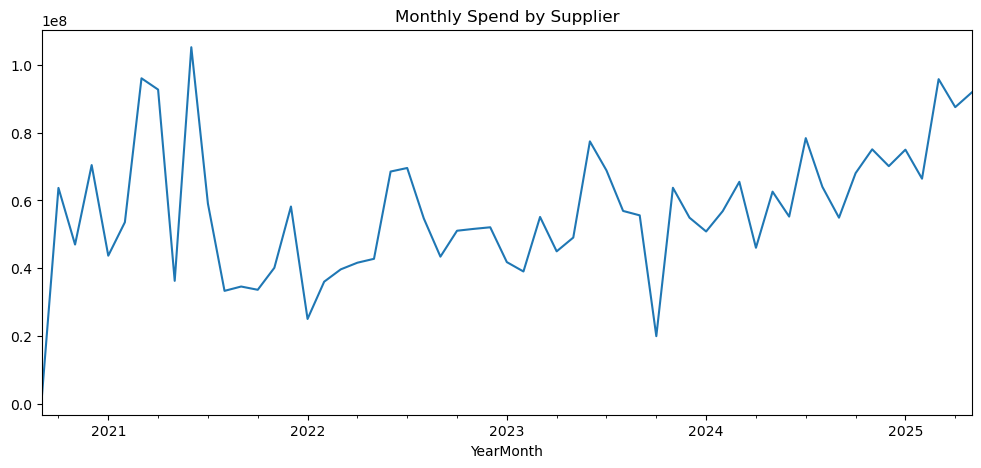

In [999]:
#ARIMA works on univariate, regularly spaced time series
#ARIMA assumes stationary data (constant mean and variance)

# Monthly spend by Supplier
ts = monthly_supplier.groupby('YearMonth')['Invoice Amount'].sum()
ts.plot(figsize=(12,5), title='Monthly Spend by Supplier')
plt.show()


In [1001]:
ts.index = pd.to_datetime(ts.index)
ts = ts.sort_index()
ts = ts.asfreq('MS')  # Monthly start frequency


In [1003]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 1.1469935094645896
p-value: 0.9955983951817388


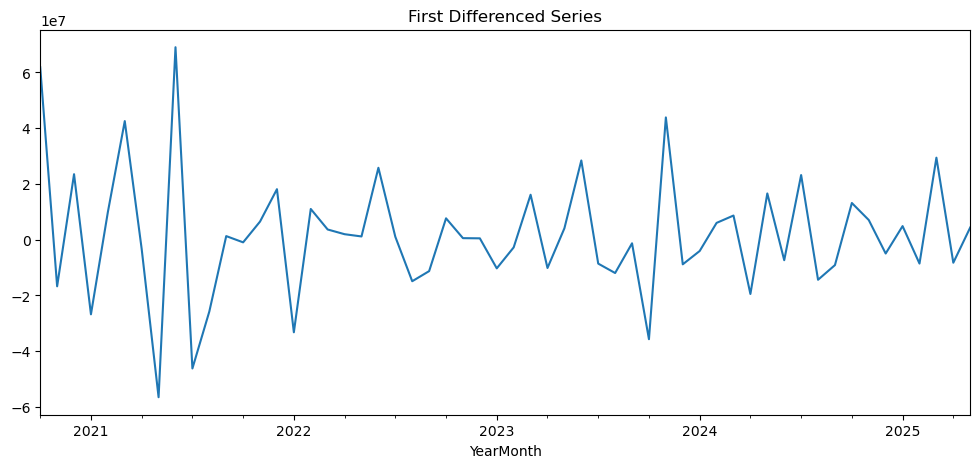

In [1005]:
#Need differencing
ts_diff = ts.diff().dropna()  # subtract previous value from current
ts_diff.plot(title='First Differenced Series', figsize=(12,5))
plt.show()

In [1007]:
result = adfuller(ts_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.8166808249287865
p-value: 0.0027411857690677775


<Figure size 1200x500 with 0 Axes>

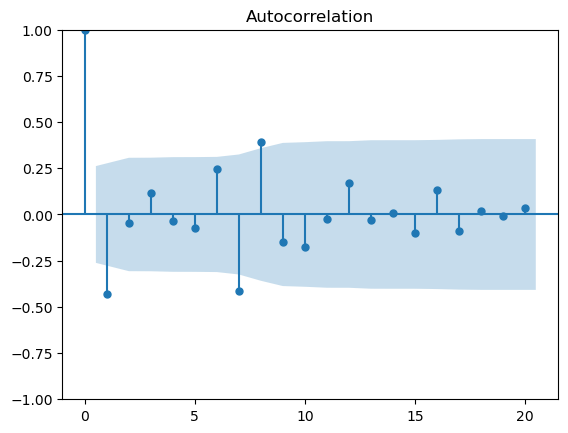

<Figure size 1200x500 with 0 Axes>

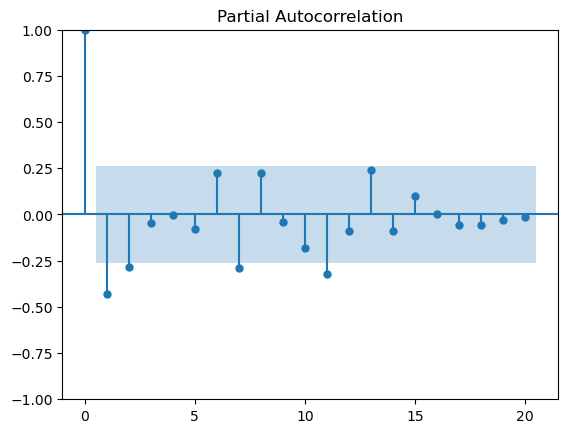

In [1009]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plot_acf(ts_diff, lags=20)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(ts_diff, lags=20)
plt.show()


In [1011]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(0,1,1))  # d=1 because we did first differencing
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         Invoice Amount   No. Observations:                   57
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1020.317
Date:                Tue, 19 Aug 2025   AIC                           2044.635
Time:                        08:49:05   BIC                           2048.685
Sample:                    09-01-2020   HQIC                          2046.205
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5942      0.082     -7.252      0.000      -0.755      -0.434
sigma2      3.133e+14    3.5e-17   8.96e+30      0.000    3.13e+14    3.13e+14
Ljung-Box (L1) (Q):                   0.00   Jarque-

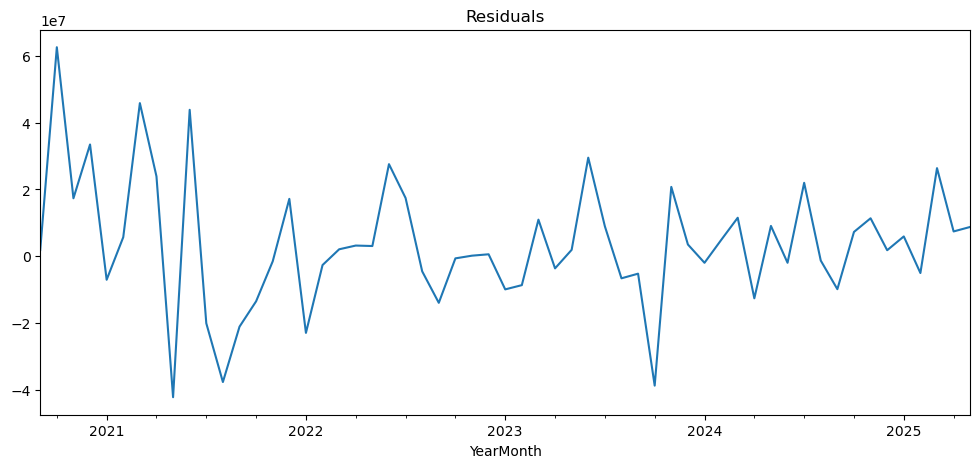

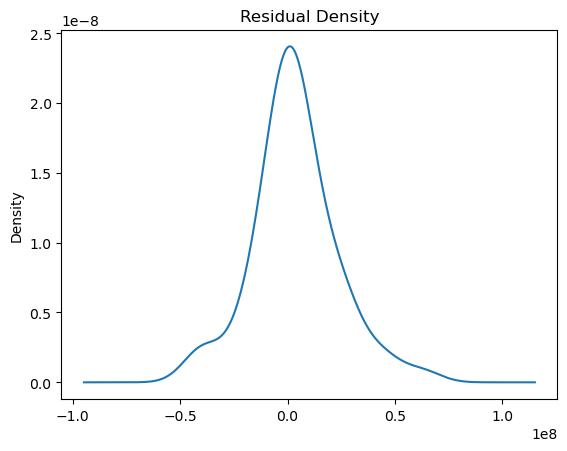

In [1013]:
residuals = model_fit.resid
residuals.plot(title='Residuals', figsize=(12,5))
plt.show()
residuals.plot(kind='kde', title='Residual Density')
plt.show()


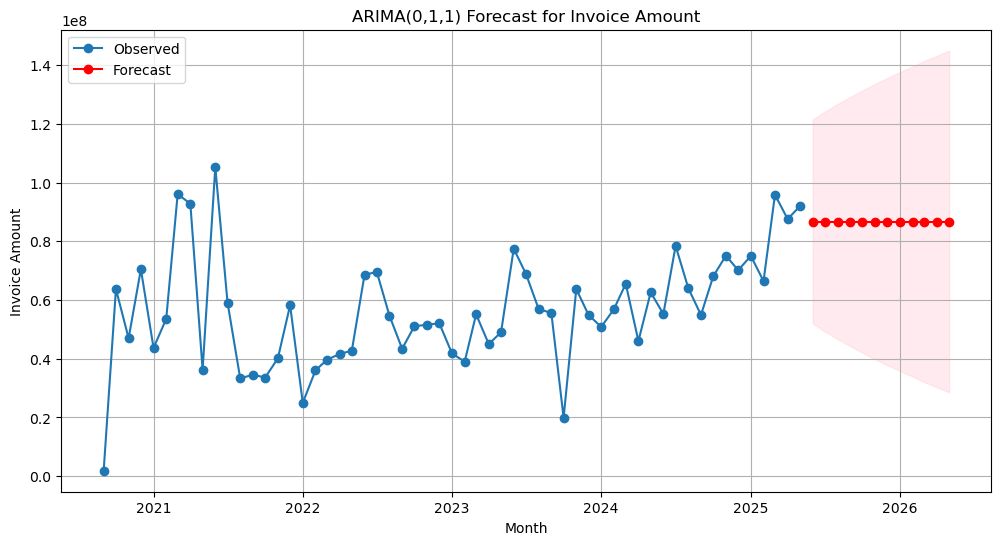

In [1015]:
# Forecast next 12 months
forecast = model_fit.get_forecast(steps=12)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ts, label='Observed', marker='o')
plt.plot(pred, label='Forecast', color='red', marker='o')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('ARIMA(0,1,1) Forecast for Invoice Amount')
plt.xlabel('Month')
plt.ylabel('Invoice Amount')
plt.legend()
plt.grid(True)
plt.show()


##### Arima Parameters to Use for Model - (0,1,1)

##### Arima vs Exponential Smoothing vs Random Forest

In [1021]:
def run_arima_ets_rf_models(ts, test_size=12, log_transform=True, seasonal_period=12, n_lags=12):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from sklearn.ensemble import RandomForestRegressor

    def evaluate_forecast(actual, predicted):
        mae = mean_absolute_error(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mape = np.mean(np.abs((actual - predicted) / actual)) * 100
        return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    def plot_forecast(train, test, forecast, title='Forecast', conf_int=None):
        plt.figure(figsize=(12, 6))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test', marker='o')
        plt.plot(forecast, label='Forecast', color='red', marker='o')

        if conf_int is not None:
            plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                             color='pink', alpha=0.3, label='95% CI')

        plt.title(title)
        plt.xlabel('Time')
        plt.ylabel('Spend')
        plt.legend()
        plt.grid(True)
        plt.show()

    # --- Optional Log Transformation ---
    if log_transform:
        if (ts <= 0).any():
            raise ValueError("Log transformation cannot be applied to non-positive values.")
        ts = np.log(ts)
        transform_applied = True
    else:
        transform_applied = False

    # --- Train/Test Split ---
    train, test = ts[:-test_size], ts[-test_size:]
    train_orig = np.exp(train) if transform_applied else train
    test_orig = np.exp(test) if transform_applied else test

    results = {}

    # --- ARIMA(0,1,1) ---
    print("Fitting ARIMA(0,1,1)...")
    arima_model = ARIMA(train, order=(0, 1, 1))
    arima_fit = arima_model.fit()

    forecast_obj = arima_fit.get_forecast(steps=test_size)
    arima_forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    if transform_applied:
        arima_forecast_orig = np.exp(arima_forecast)
        conf_int_orig = np.exp(conf_int)
    else:
        arima_forecast_orig = arima_forecast
        conf_int_orig = conf_int

    results['ARIMA(0,1,1)'] = evaluate_forecast(test_orig, arima_forecast_orig)
    plot_forecast(train_orig, test_orig, arima_forecast_orig,
                  title='ARIMA(0,1,1) Forecast with 95% CI', conf_int=conf_int_orig)

    # --- ETS ---
    print("Fitting Exponential Smoothing (additive)...")
    ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=seasonal_period)
    ets_fit = ets_model.fit()
    ets_forecast = ets_fit.forecast(test_size)

    ets_forecast_orig = np.exp(ets_forecast) if transform_applied else ets_forecast
    results['ETS (Additive)'] = evaluate_forecast(test_orig, ets_forecast_orig)
    plot_forecast(train_orig, test_orig, ets_forecast_orig,
                  title='Exponential Smoothing Forecast')

    # --- Random Forest ---
    print("Fitting Random Forest Regressor...")

    def create_lag_features(series, n_lags):
        df = pd.DataFrame({'y': series})
        for lag in range(1, n_lags + 1):
            df[f'lag_{lag}'] = df['y'].shift(lag)
        return df.dropna()

    supervised = create_lag_features(ts, n_lags)
    X, y = supervised.drop('y', axis=1), supervised['y']

    # Align train/test based on lagged data
    split_point = len(train) - n_lags
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)

    rf_forecast = rf.predict(X_test)

    # ✅ align forecast with test index
    rf_forecast_orig = np.exp(rf_forecast) if transform_applied else rf_forecast
    rf_forecast_orig = pd.Series(rf_forecast_orig, index=test_orig.index)

    results['Random Forest'] = evaluate_forecast(test_orig, rf_forecast_orig)

    plot_forecast(train_orig, test_orig, rf_forecast_orig,
              title='Random Forest Forecast')
    
    # --- Accuracy Summary ---
    results_df = pd.DataFrame(results).T
    print("\n🔍 Forecast Accuracy Comparison:")
    print(results_df.round(2))

    return results_df


Fitting ARIMA(0,1,1)...


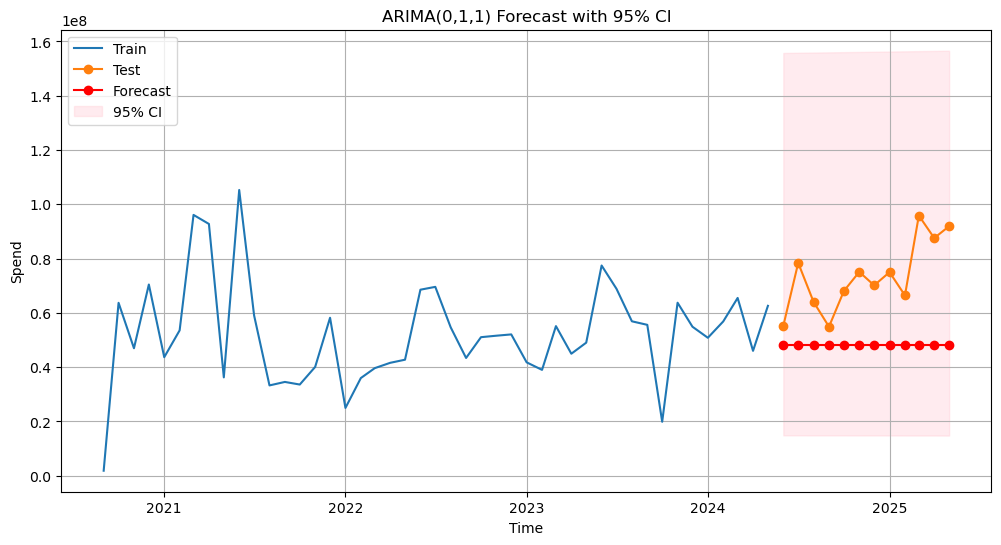

Fitting Exponential Smoothing (additive)...


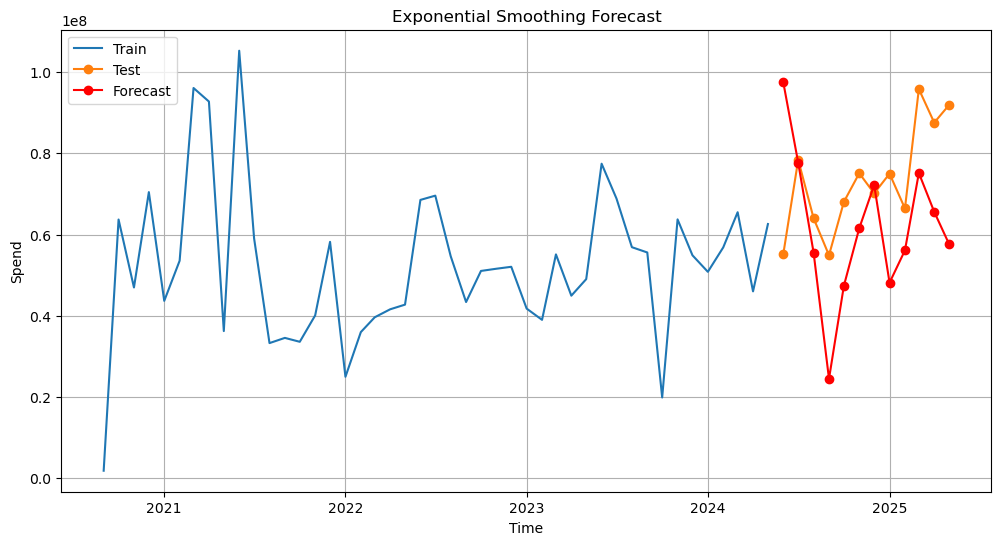

Fitting Random Forest Regressor...


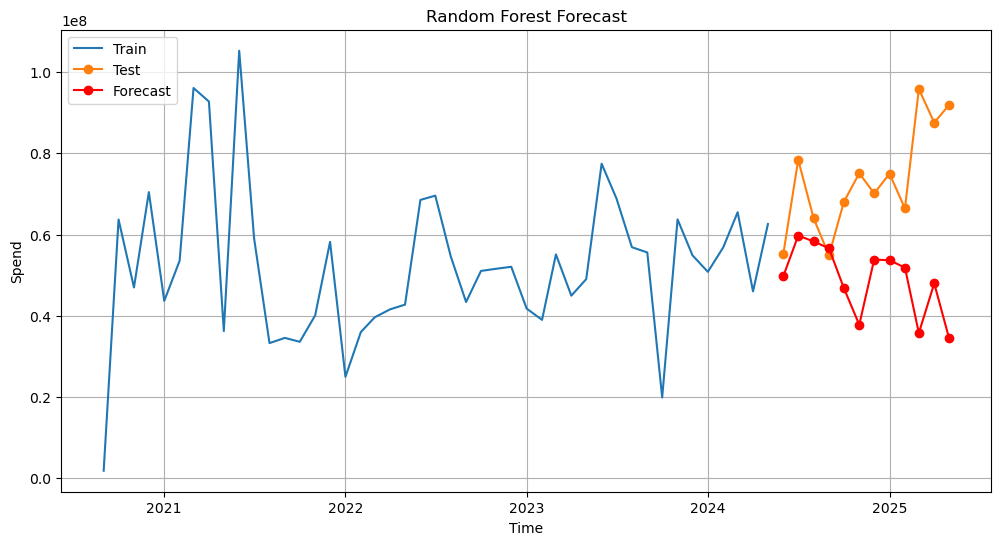


🔍 Forecast Accuracy Comparison:
                        MAE         RMSE   MAPE
ARIMA(0,1,1)    25402355.79  28385689.73  32.56
ETS (Additive)  19351095.17  22930349.61  27.72
Random Forest   24953298.57  31186868.24  30.89


,MAE,RMSE,MAPE
"ARIMA(0,1,1)",2.540236e+07,2.838569e+07,32.558644
ETS (Additive),1.935110e+07,2.293035e+07,27.720530
Random Forest,2.495330e+07,3.118687e+07,30.886880


In [1023]:
run_arima_ets_rf_models(ts)

Based on initial accuracy metrics, exponential smoothing seems to be a more accurate model to use

#### Fine tuning Exponential Smoothing Model

In [1025]:
def tune_ets(ts, test_size=12, seasonal_period=12, log_transform=True):
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        return mae, rmse, mape

    # --- Log transform if requested ---
    if log_transform:
        if (ts <= 0).any():
            raise ValueError("Log transformation cannot be applied to non-positive values.")
        ts = np.log(ts)
        transform_applied = True
    else:
        transform_applied = False

    # --- Train-test split ---
    train, test = ts[:-test_size], ts[-test_size:]
    test_orig = np.exp(test) if transform_applied else test

    trends = [None, 'add']
    seasonals = [None, 'add', 'mul']
    damped_opts = [False, True]

    results = []

    # --- Grid search ---
    for trend in trends:
        for seasonal in seasonals:
            for damped in damped_opts:
                if trend is None and damped:
                    continue  # Can't apply dampening without a trend

                try:
                    if seasonal is not None:
                        model = ExponentialSmoothing(
                            train,
                            trend=trend,
                            damped_trend=damped,
                            seasonal=seasonal,
                            seasonal_periods=seasonal_period
                        )
                    else:
                        model = ExponentialSmoothing(
                            train,
                            trend=trend,
                            damped_trend=damped
                        )

                    fit = model.fit(optimized=True)
                    forecast = fit.forecast(test_size)
                    forecast_orig = np.exp(forecast) if transform_applied else forecast

                    mae, rmse, mape = evaluate(test_orig, forecast_orig)

                    results.append({
                        'Trend': trend,
                        'Seasonal': seasonal,
                        'Damped': damped,
                        'MAE': mae,
                        'RMSE': rmse,
                        'MAPE': mape
                    })

                except Exception as e:
                    continue  # Silently skip models that fail

    results_df = pd.DataFrame(results)
    return results_df.sort_values('MAPE').reset_index(drop=True)


In [1027]:
best_models = tune_ets(ts, test_size=12, seasonal_period=12, log_transform=True)
print(best_models.head())

  Trend Seasonal  Damped           MAE          RMSE       MAPE
0   add     None   False  1.386311e+07  1.696915e+07  17.242413
1   add     None    True  1.515224e+07  1.857809e+07  18.781503
2   add      add   False  1.935110e+07  2.293035e+07  27.720530
3   add      add    True  2.401213e+07  2.624772e+07  33.087031
4  None     None   False  2.637964e+07  2.926351e+07  33.927460


In [1029]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

def fit_forecast_ets(ts, forecast_periods=12, test_size=12, log_transform=True):
    # Log transform
    if log_transform:
        if (ts <= 0).any():
            raise ValueError("Log transform cannot be applied to non-positive values.")
        ts_log = np.log(ts)
    else:
        ts_log = ts.copy()
    
    train, test = ts_log[:-test_size], ts_log[-test_size:]
    
    # Fit ETS best model (trend='add', no seasonality, no damping)
    model = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(optimized=True)
    
    # Forecast on test period for accuracy
    test_forecast_log = fit.forecast(test_size)
    test_forecast = np.exp(test_forecast_log) if log_transform else test_forecast_log
    test_orig = np.exp(test) if log_transform else test
    
    accuracy = evaluate_forecast(test_orig, test_forecast)
    
    # Refit model on full data and forecast future
    model_full = ExponentialSmoothing(ts_log, trend='add', seasonal=None, damped_trend=False)
    fit_full = model_full.fit(optimized=True)
    future_forecast_log = fit_full.forecast(forecast_periods)
    future_forecast = np.exp(future_forecast_log) if log_transform else future_forecast_log
    
    return accuracy, future_forecast

def forecast_on_groups(df, group_col, value_col='Invoice Amount', forecast_periods=12, test_size=12, top_n=None, log_transform=True, date_col='YearMonth'):
    results = []
    accuracies = []
    
    if group_col is None:
        # Single series: total spend
        ts = df.groupby(date_col)[value_col].sum().sort_index()
        accuracy, forecast = fit_forecast_ets(ts, forecast_periods, test_size, log_transform)
        results.append({'Group': 'Total', 'Forecast': forecast})
        accuracies.append({'Group': 'Total', **accuracy})
        
    else:
        # Multiple groups
        # Select top N groups if requested
        if top_n is not None:
            total_spend_by_group = df.groupby(group_col)[value_col].sum()
            top_groups = total_spend_by_group.sort_values(ascending=False).head(top_n).index.tolist()
        else:
            top_groups = df[group_col].unique()
        
        for group in top_groups:
            ts = df[df[group_col] == group].groupby(date_col)[value_col].sum().sort_index()
            # Skip groups with too few data points
            if len(ts) < (test_size + 1):
                continue
            
            accuracy, forecast = fit_forecast_ets(ts, forecast_periods, test_size, log_transform)
            results.append({'Group': group, 'Forecast': forecast})
            accuracies.append({'Group': group, **accuracy})
            
    accuracy_df = pd.DataFrame(accuracies)
    return results, accuracy_df

# ==== USAGE EXAMPLES ====

# 1) Total Spend
total_results, total_accuracy = forecast_on_groups(
    monthly_total, 
    group_col=None, 
    value_col='Invoice Amount', 
    date_col='YearMonth',
    forecast_periods=12, 
    test_size=12, 
    log_transform=True)

# 2) L1 Category (all categories)
l1_results, l1_accuracy = forecast_on_groups(
    monthly_l1, 
    group_col='Level 1 Category', 
    value_col='Invoice Amount', 
    date_col='YearMonth',
    forecast_periods=12, 
    test_size=12, 
    log_transform=True)

# 3) Top 20 Suppliers
supplier_results, supplier_accuracy = forecast_on_groups(
    monthly_supplier, 
    group_col='Supplier Name', 
    value_col='Invoice Amount', 
    date_col='YearMonth',
    forecast_periods=12, 
    test_size=12, 
    top_n=20, 
    log_transform=True)

# ---- Display accuracies ----
print("Total Spend Accuracy:\n", total_accuracy)
print("\nL1 Category Accuracy (sample):\n", l1_accuracy.head())
print("\nTop 20 Suppliers Accuracy (sample):\n", supplier_accuracy.head())

# ---- Example: Access forecasts ----
print("\nTotal Spend Future Forecast:")
print(total_results[0]['Forecast'])

print("\nFirst Supplier Future Forecast:")
print(supplier_results[0]['Group'])
print(supplier_results[0]['Forecast'])


Total Spend Accuracy:
    Group           MAE          RMSE       MAPE
0  Total  1.386311e+07  1.696915e+07  17.242413

L1 Category Accuracy (sample):
                            Group           MAE          RMSE        MAPE
0              Advisory Services  3.500144e+06  3.794411e+06  101.088726
1  Business (Corporate) Services  1.993385e+06  2.295397e+06   22.148733
2          Construction Services  4.530115e+06  4.990947e+06   36.387313
3          Facilities Management  2.985388e+06  7.342569e+06   40.634224
4                          Fleet  1.992721e+06  2.341690e+06   44.467990

Top 20 Suppliers Accuracy (sample):
                                 Group           MAE          RMSE        MAPE
0                      ZINFRA PTY LTD  4.876253e+06  6.108169e+06  148.231966
1  CONSOLIDATED POWER PROJECTS_035038  1.668302e+06  1.925153e+06  396.484605
2       TAIHAN ELECTRIC AUSTRALIA P/L  1.019922e+06  1.258777e+06         NaN
3      UGL ENGINEERING PTY LTD_029620  3.729004e+06  4.35874

<Figure size 1200x600 with 0 Axes>

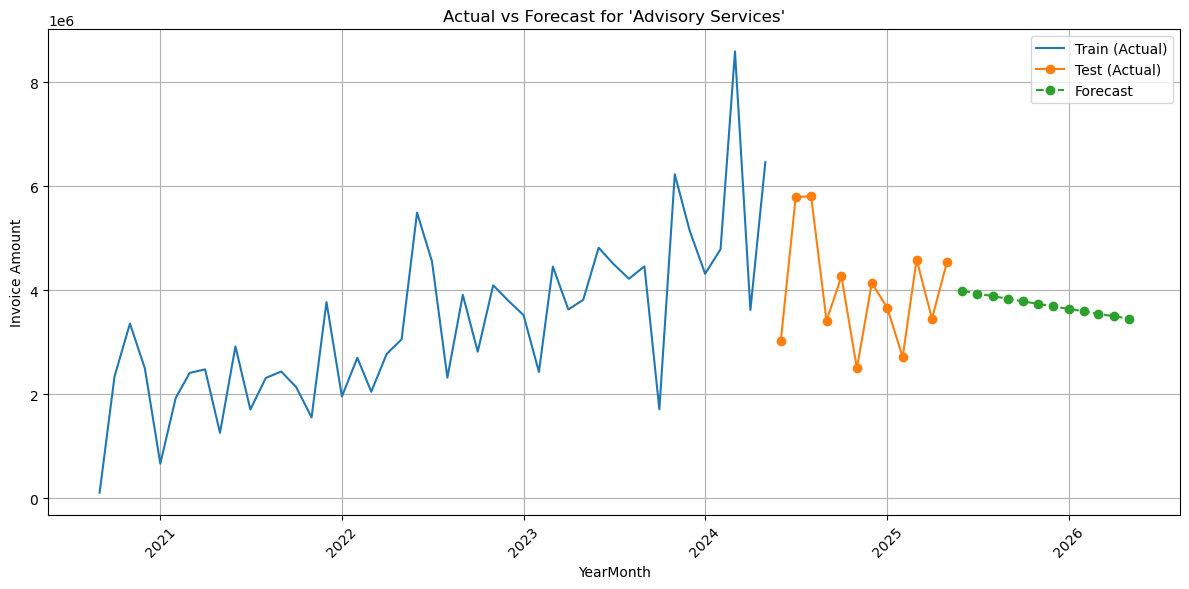

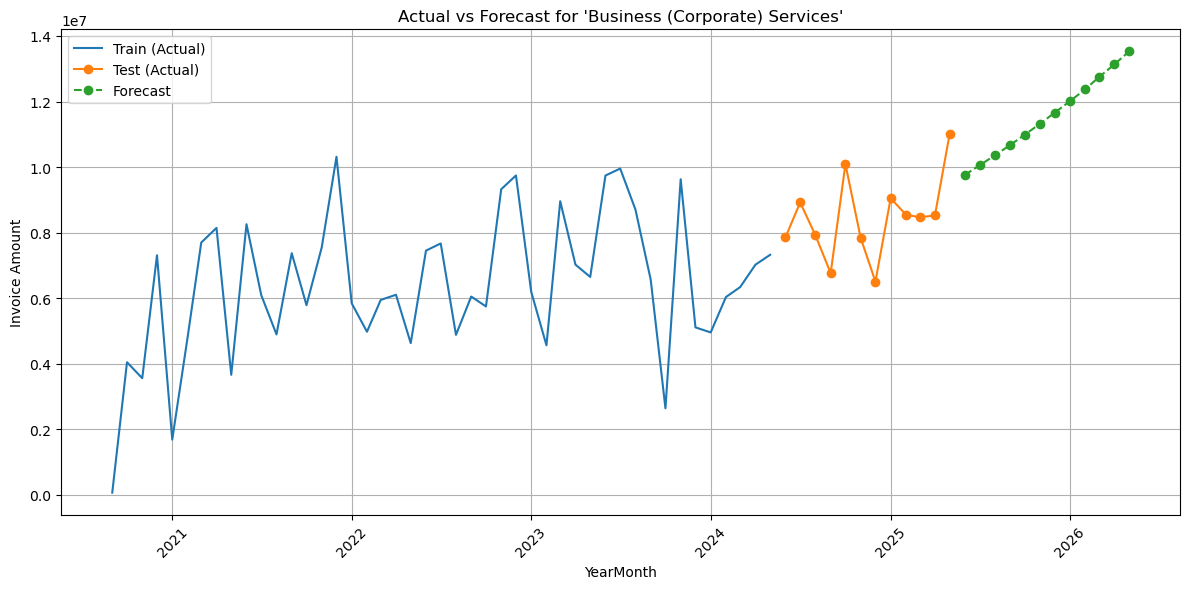

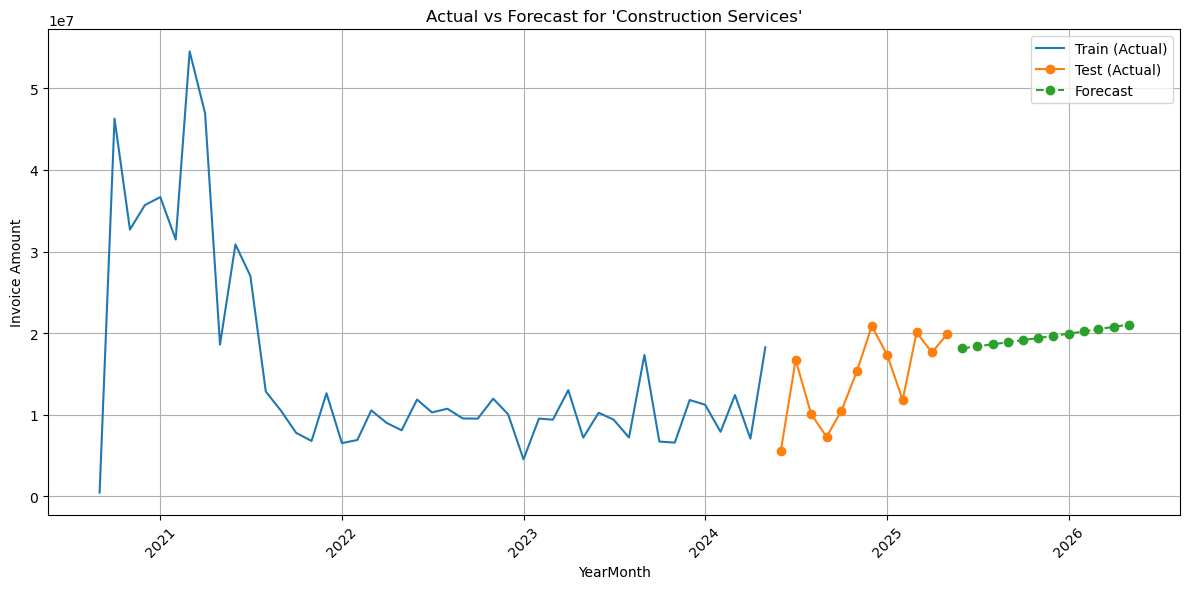

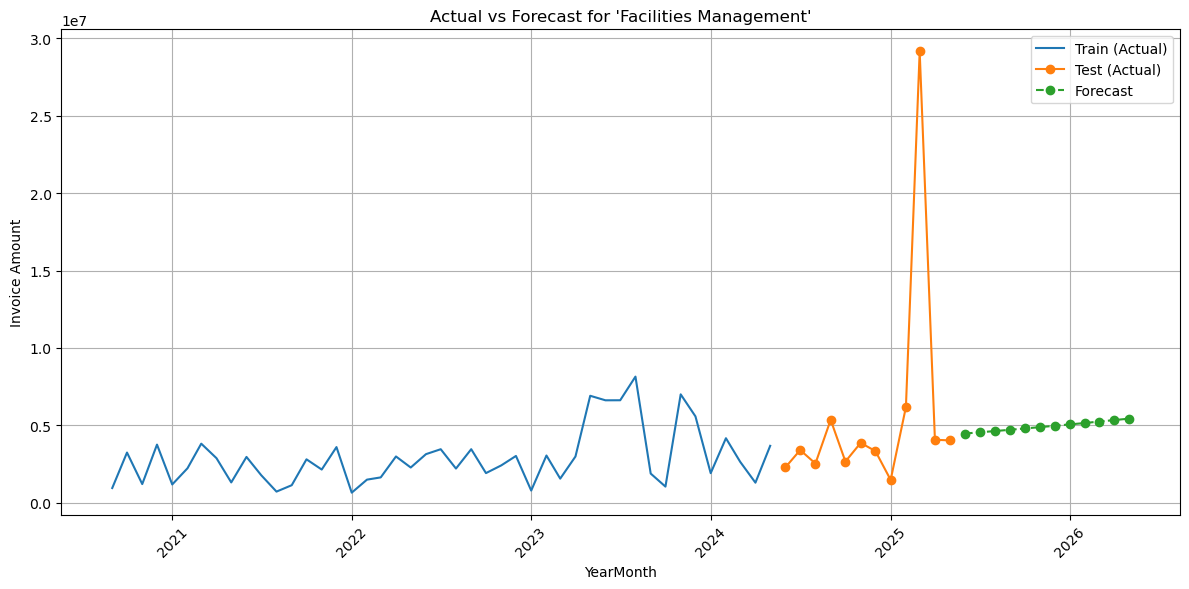

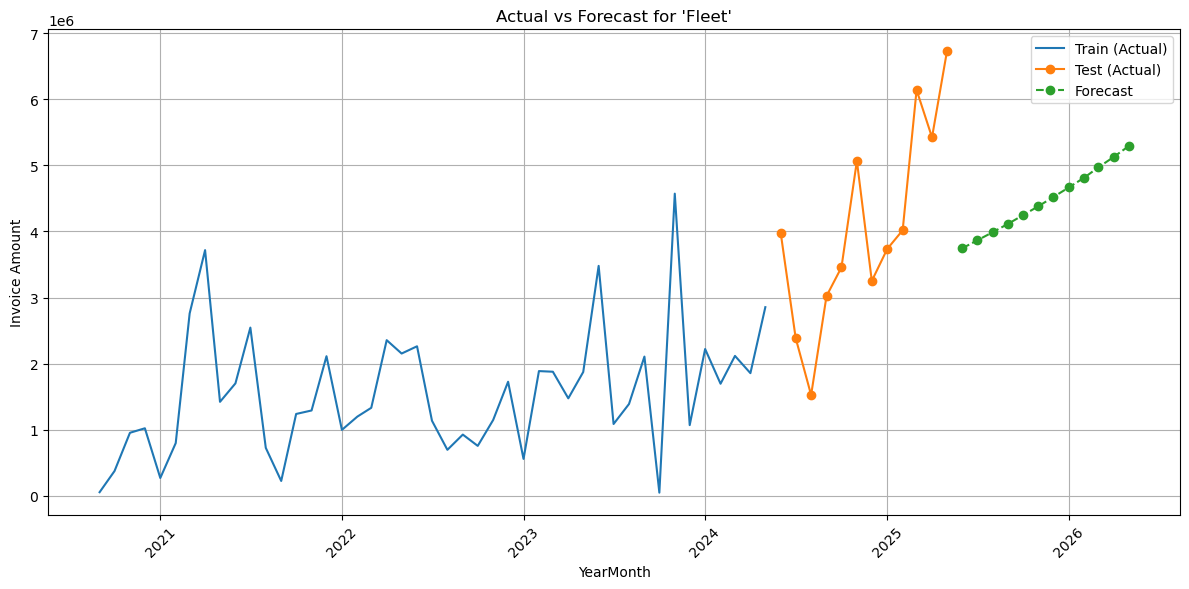

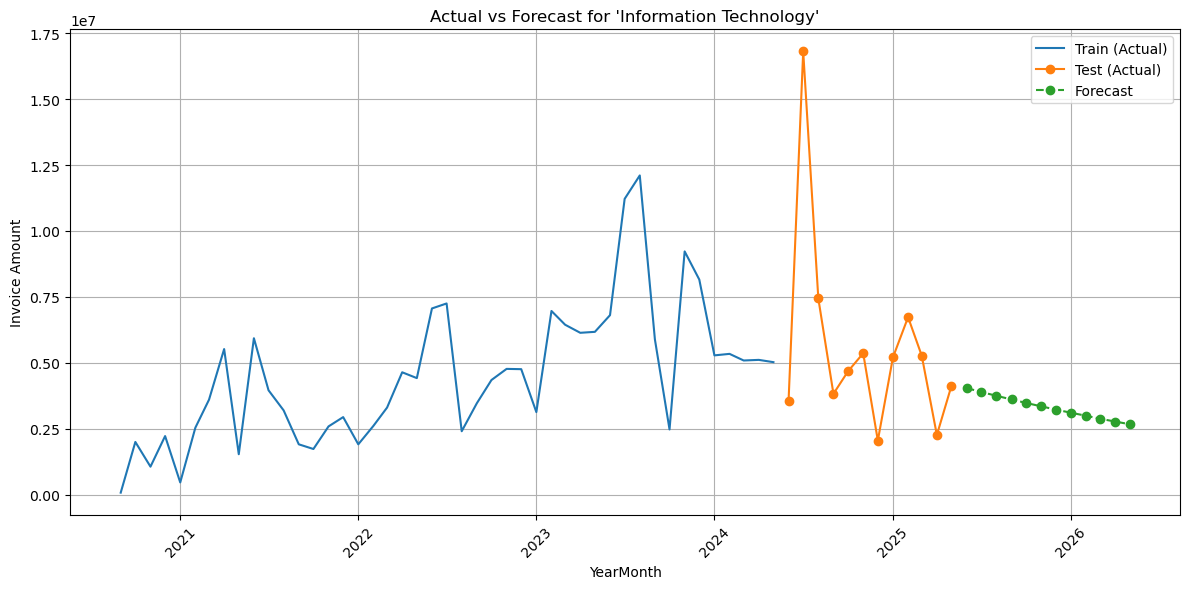

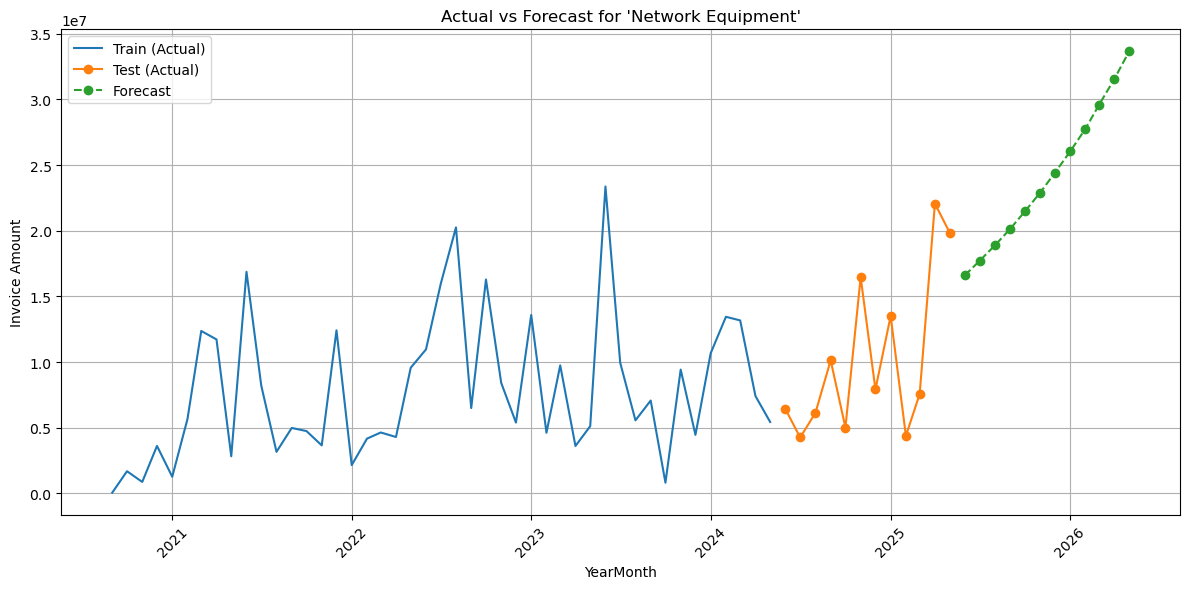

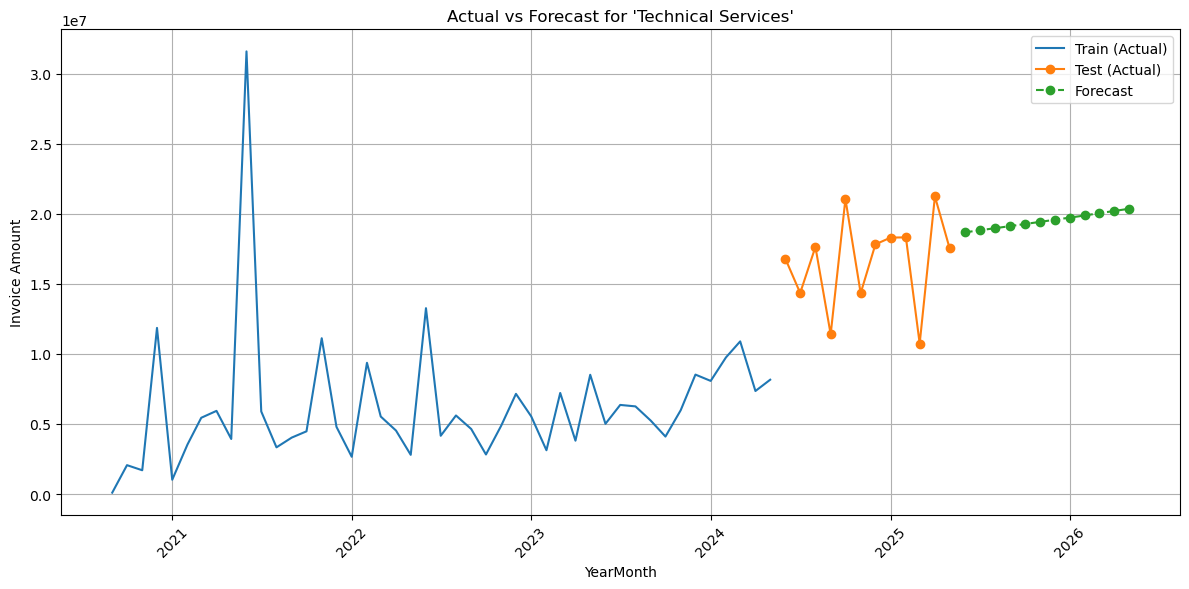

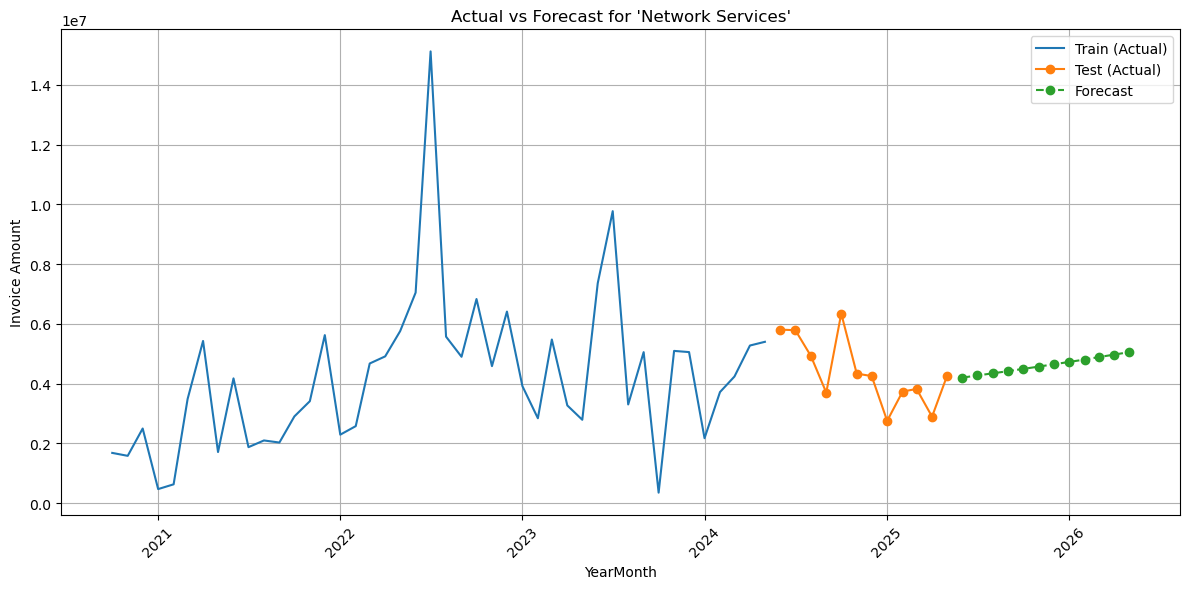

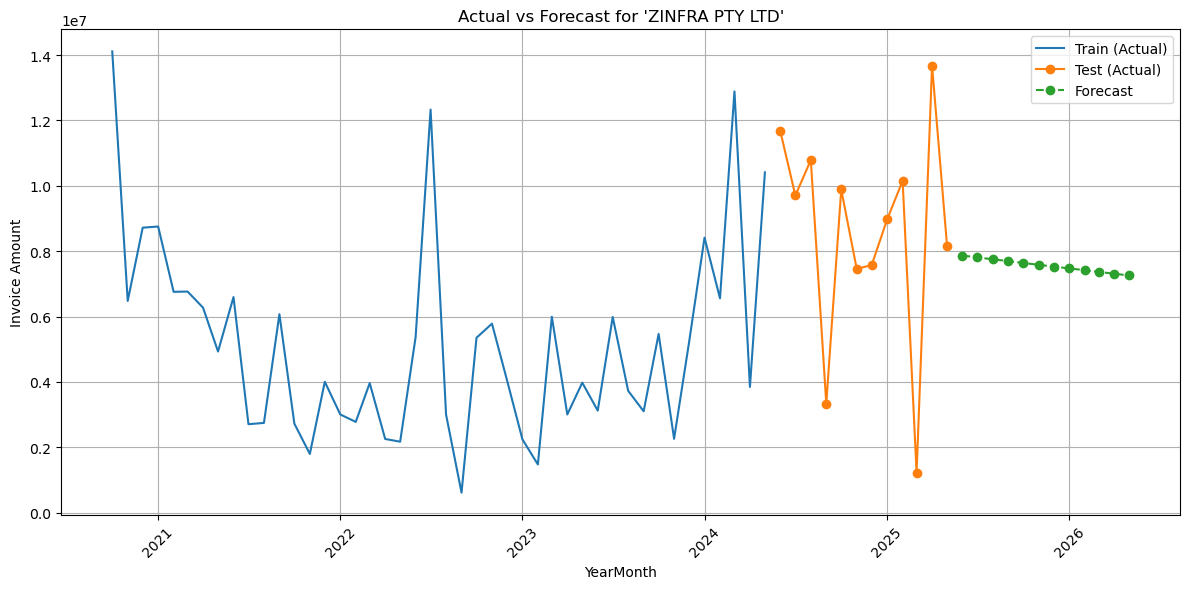

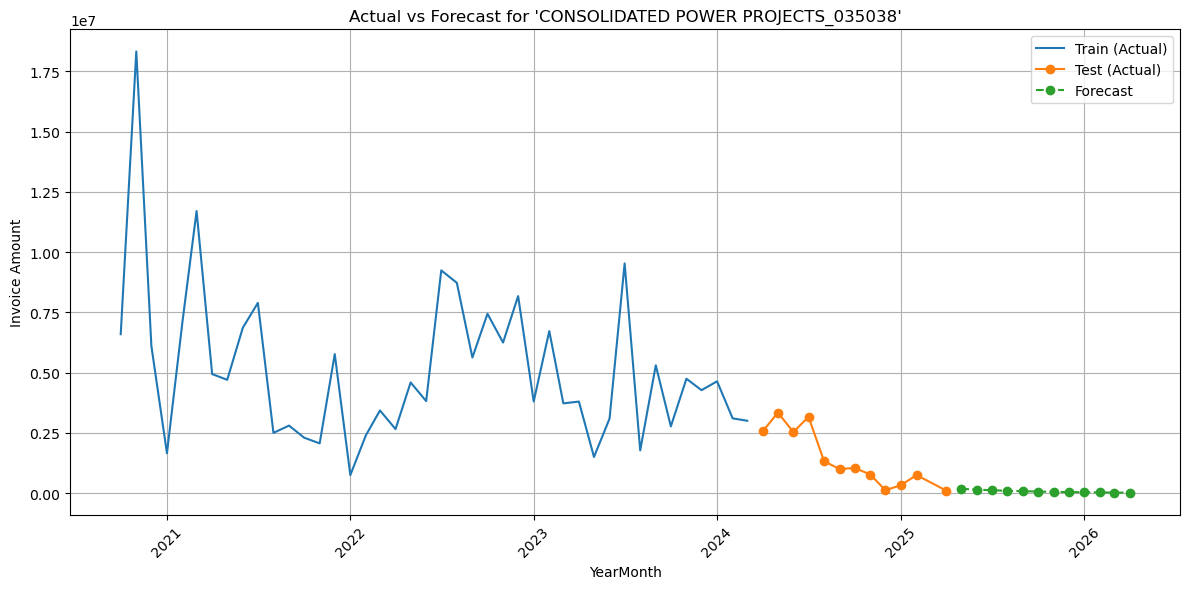

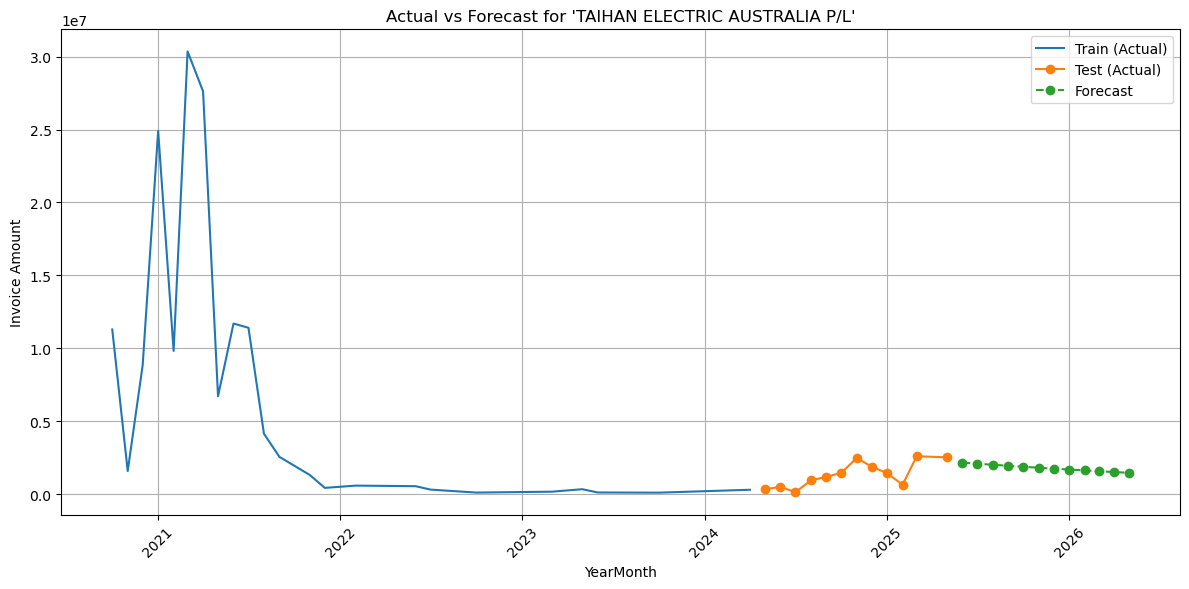

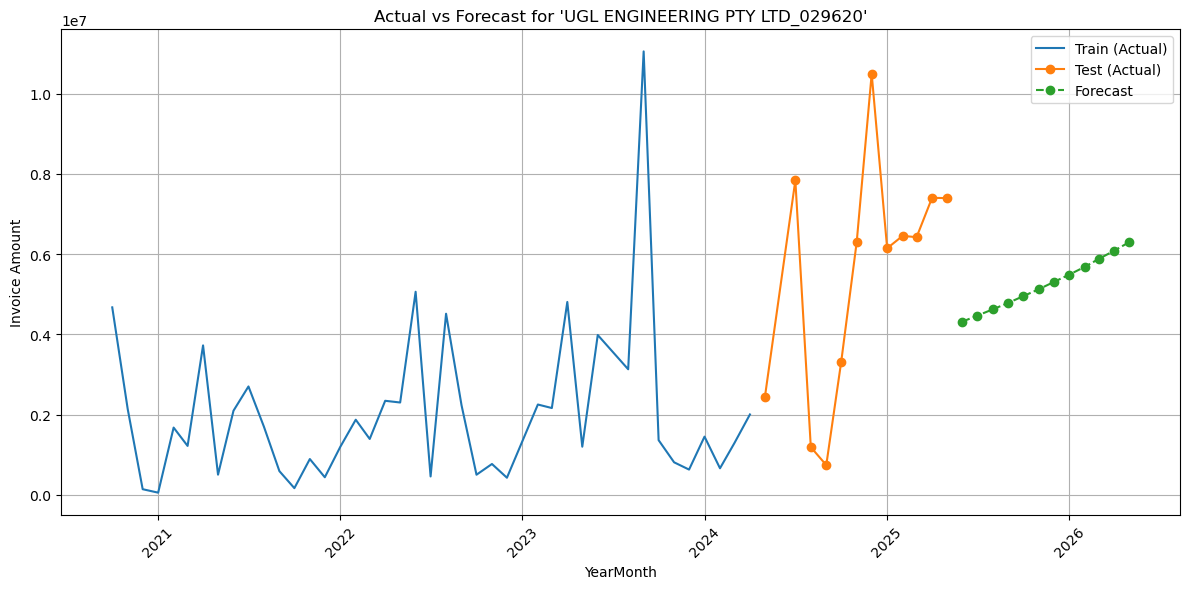

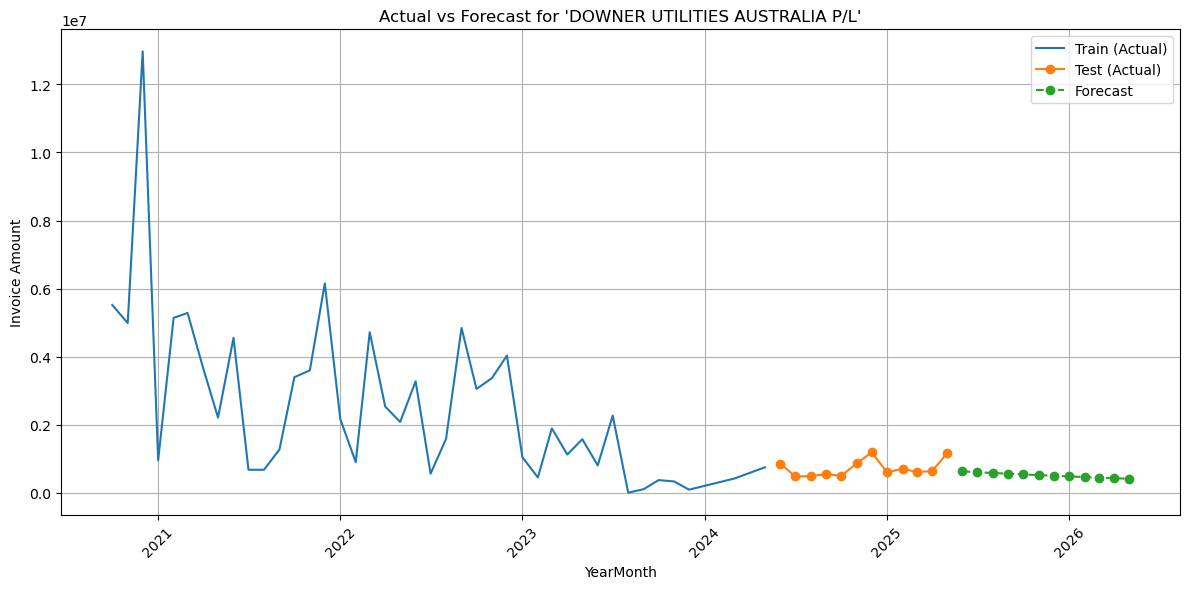

In [1031]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


def plot_actual_vs_forecast(df, group_col, forecast_results, value_col='Invoice Amount', test_size=12, log_transform=True, top_n=None):
    import pandas as pd
    import matplotlib.pyplot as plt

    groups_to_plot = forecast_results if top_n is None else forecast_results[:top_n]

    for item in groups_to_plot:
        group = item['Group']
        forecast = item['Forecast']

        if group == 'Total' or group_col is None:
            ts = df.groupby('YearMonth')[value_col].sum().sort_index()
        else:
            ts = df[df[group_col] == group].groupby('YearMonth')[value_col].sum().sort_index()

        # Split train and test for actuals (same as modeling)
        train = ts[:-test_size]
        test = ts[-test_size:]

        # Ensure YearMonth is datetime type and frequency is set
        if not pd.api.types.is_datetime64_any_dtype(ts.index):
            ts.index = pd.to_datetime(ts.index)
        freq = pd.infer_freq(ts.index)
        if freq is None:
            freq = 'MS'  # assume monthly start if frequency can't be inferred

        # Fix forecast index: create a date range starting from the next period after ts last index
        forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq=freq)
        forecast.index = forecast_index

        # Plot
        plt.figure(figsize=(12,6))
        plt.plot(train.index, train.values, label='Train (Actual)')
        plt.plot(test.index, test.values, label='Test (Actual)', marker='o')
        plt.plot(forecast.index, forecast.values, label='Forecast', marker='o', linestyle='--')

        plt.title(f"Actual vs Forecast for '{group}'")
        plt.xlabel('YearMonth')
        plt.ylabel(value_col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Usage ===

# Plot all L1 categories
plot_actual_vs_forecast(monthly_l1, group_col='Level 1 Category', forecast_results=l1_results, 
                        value_col='Invoice Amount', test_size=12, log_transform=True)

# Plot top 5 suppliers
plot_actual_vs_forecast(monthly_supplier, group_col='Supplier Name', forecast_results=supplier_results,
                        value_col='Invoice Amount', test_size=12, log_transform=True, top_n=5)


### G. Drift Monitoring

In [1033]:
def detect_drift(test_mape, historical_mape, recent_mean_spend, historical_mean_spend,
                 error_drift_threshold=1.5, spend_drift_threshold=0.3):
    # Calculate relative spend change
    spend_relative_change = abs(recent_mean_spend - historical_mean_spend) / historical_mean_spend if historical_mean_spend != 0 else 0
    
    # Check drift flags
    error_drift_flag = test_mape > (error_drift_threshold * historical_mape)
    spend_drift_flag = spend_relative_change > spend_drift_threshold
    drift_flag = error_drift_flag or spend_drift_flag
    
    return drift_flag, spend_relative_change


In [1035]:
def fit_forecast_ets(ts, forecast_periods=12, test_size=12, log_transform=True,
                     error_drift_threshold=1.5, spend_drift_threshold=0.3):
    if log_transform:
        if (ts <= 0).any():
            raise ValueError("Log transform cannot be applied to non-positive values.")
        ts_log = np.log(ts)
    else:
        ts_log = ts.copy()
    
    train_log, test_log = ts_log[:-test_size], ts_log[-test_size:]
    train_orig, test_orig = ts[:-test_size], ts[-test_size:]
    
    hist_val_size = min(test_size, max(1, len(train_log) // 4))
    hist_train_log = train_log[:-hist_val_size]
    hist_val_log = train_log[-hist_val_size:]
    hist_train_orig = train_orig[:-hist_val_size]
    hist_val_orig = train_orig[-hist_val_size:]
    
    model_hist = ExponentialSmoothing(hist_train_log, trend='add', seasonal=None, damped_trend=False)
    fit_hist = model_hist.fit(optimized=True)
    hist_val_pred_log = fit_hist.forecast(hist_val_size)
    hist_val_pred = np.exp(hist_val_pred_log) if log_transform else hist_val_pred_log
    historical_accuracy = evaluate_forecast(hist_val_orig, hist_val_pred)
    historical_mape = historical_accuracy['MAPE']
    
    model = ExponentialSmoothing(train_log, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(optimized=True)
    test_forecast_log = fit.forecast(test_size)
    test_forecast = np.exp(test_forecast_log) if log_transform else test_forecast_log
    test_accuracy = evaluate_forecast(test_orig, test_forecast)
    test_mape = test_accuracy['MAPE']
    
    # Calculate spend means for drift detection
    historical_mean_spend = hist_train_orig.mean()
    recent_mean_spend = test_orig.mean()
    
    # Detect drift by calling the separate function
    drift_flag, spend_relative_change = detect_drift(
        test_mape, historical_mape, recent_mean_spend, historical_mean_spend,
        error_drift_threshold, spend_drift_threshold
    )
    
    model_full = ExponentialSmoothing(ts_log, trend='add', seasonal=None, damped_trend=False)
    fit_full = model_full.fit(optimized=True)
    future_forecast_log = fit_full.forecast(forecast_periods)
    future_forecast = np.exp(future_forecast_log) if log_transform else future_forecast_log
    
    return test_accuracy, future_forecast, drift_flag, spend_relative_change, test_mape, historical_mape


In [1037]:
#Drift Monitoring Test


=== Forecast for Business (Corporate) Services ===
Drift Detected: True
Spend Relative Change: 0.3518649717682457
Test MAPE: 22.14873299387541
Historical MAPE: 69.33056328606345


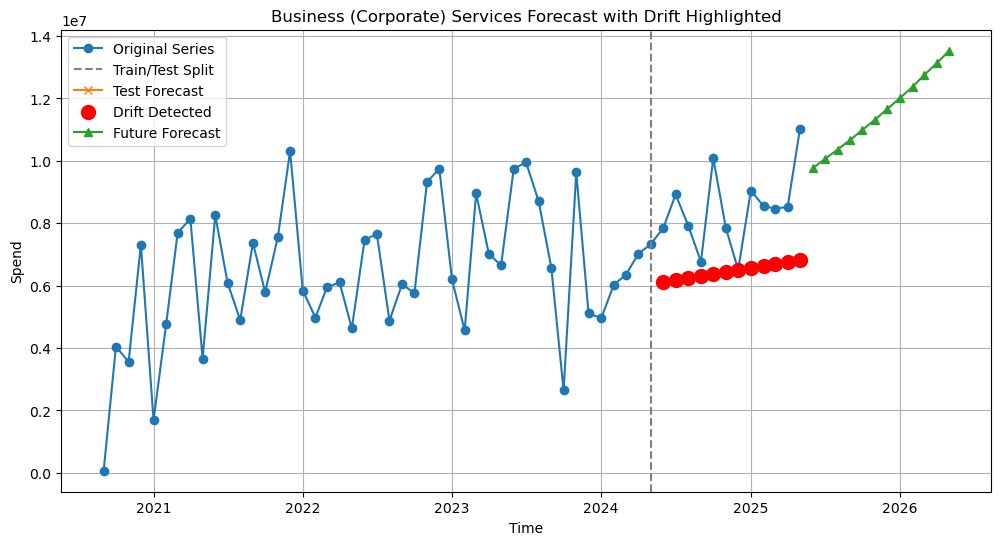


=== Forecast for Network Equipment ===
Drift Detected: True
Spend Relative Change: 0.3342497573794885
Test MAPE: 69.85616044886748
Historical MAPE: 486.4224248975139


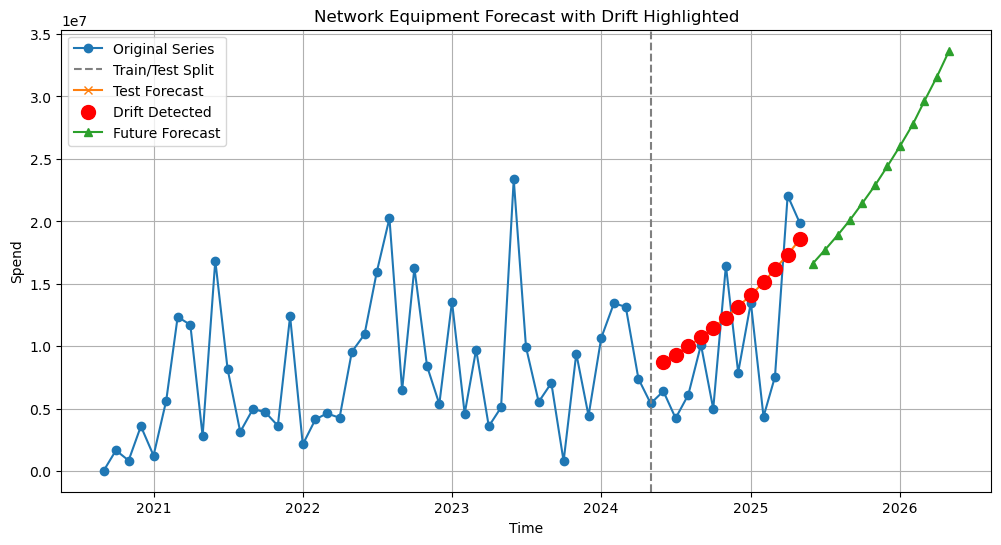


=== Forecast for Construction Services ===
Drift Detected: False
Spend Relative Change: 0.1556849276245275
Test MAPE: 36.38731345748154
Historical MAPE: 33.251627086047755


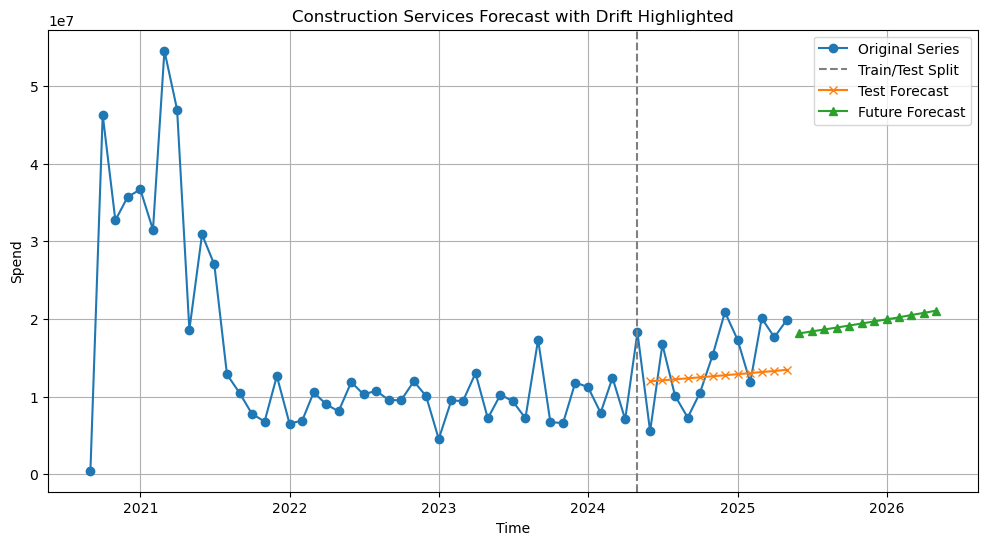


=== Forecast for Network Services ===
Drift Detected: False
Spend Relative Change: 0.0645993380184058
Test MAPE: 39.23413126136466
Historical MAPE: 300.6314517884441


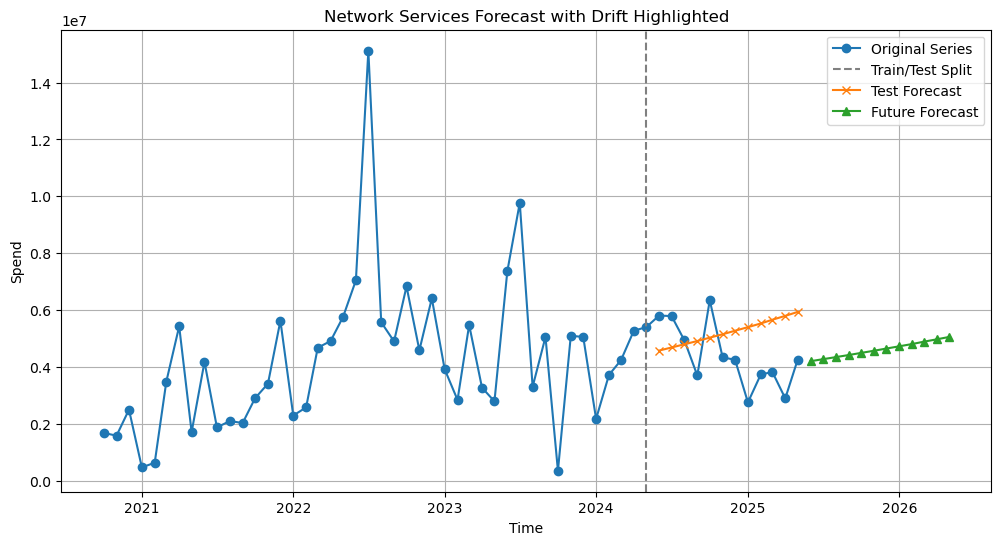


=== Forecast for Technical Services ===
Drift Detected: True
Spend Relative Change: 1.8070303978400408
Test MAPE: 24.70849037258942
Historical MAPE: 17.61352961526257


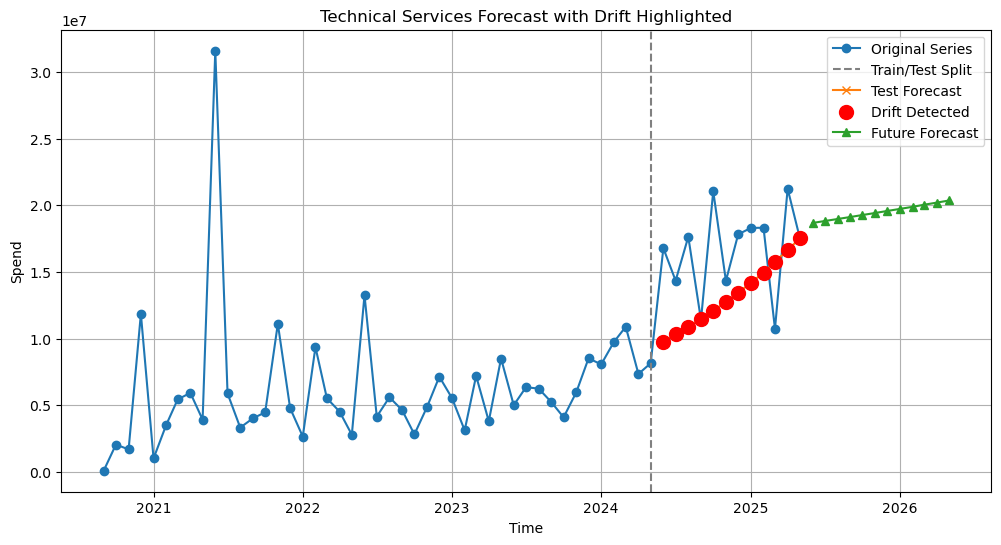


=== Forecast for Facilities Management ===
Drift Detected: True
Spend Relative Change: 1.2470825552564135
Test MAPE: 40.63422449097428
Historical MAPE: 70.86191469723856


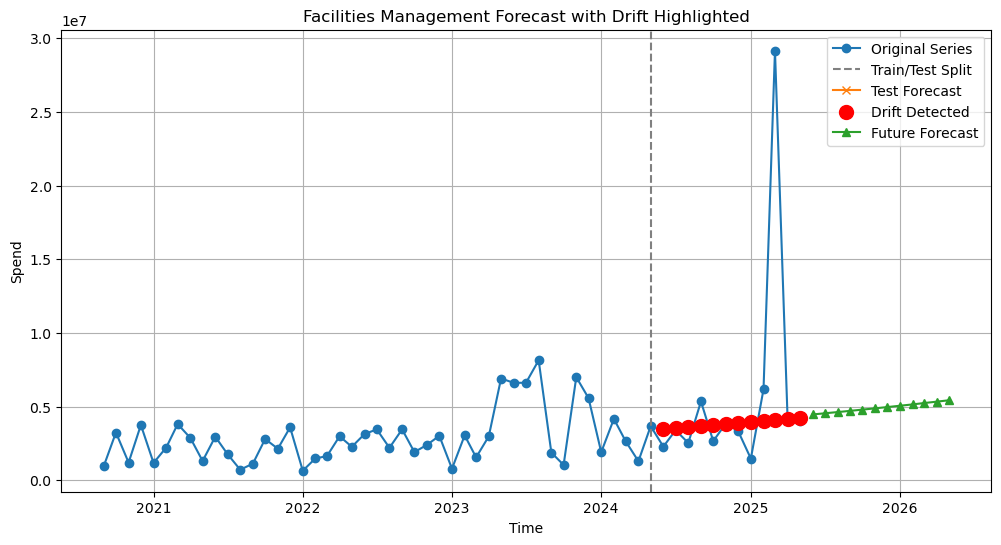


=== Forecast for Fleet ===
Drift Detected: True
Spend Relative Change: 1.814422058357356
Test MAPE: 44.467989960824596
Historical MAPE: 857.2676773474543


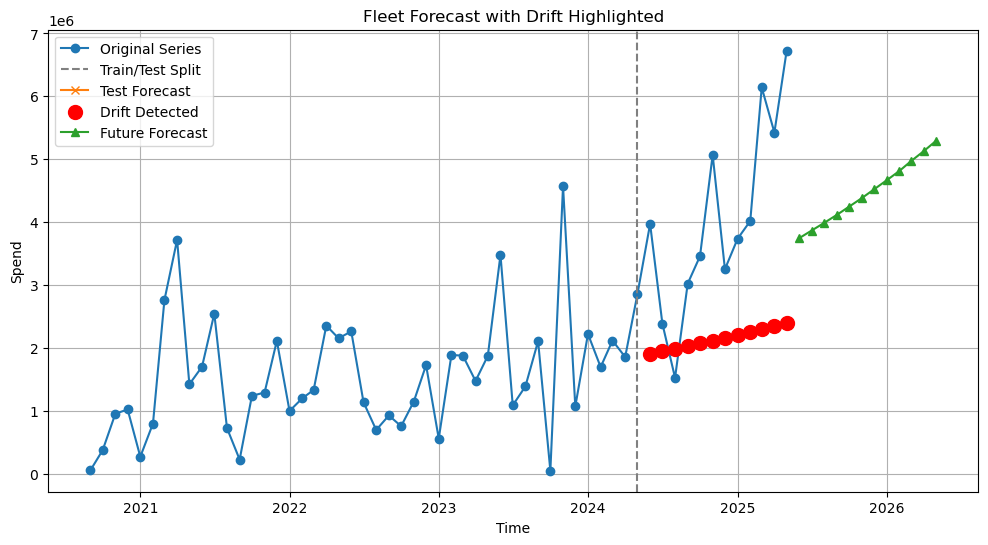


=== Forecast for Information Technology ===
Drift Detected: True
Spend Relative Change: 0.49228934376817474
Test MAPE: 130.92797958366873
Historical MAPE: 107.71187210452018


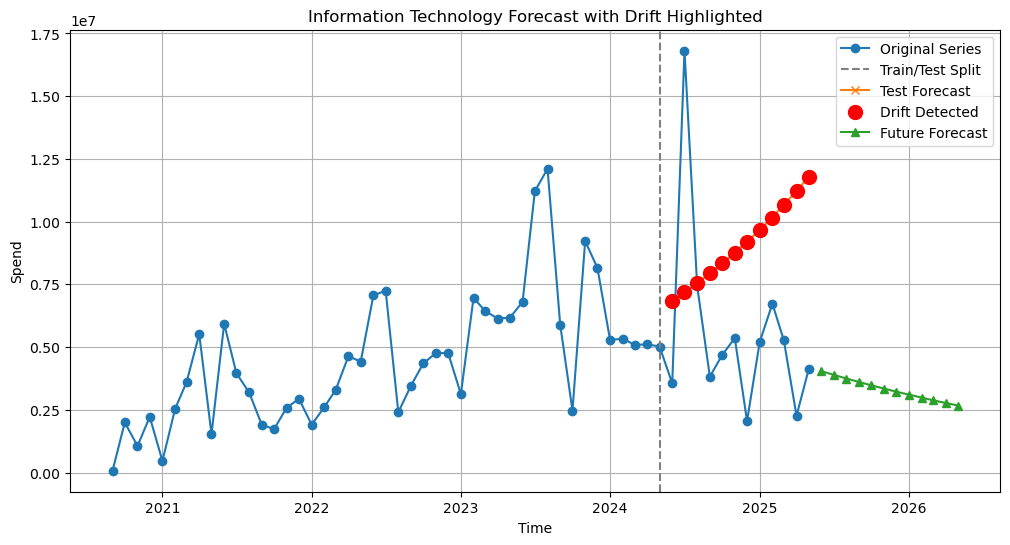


=== Forecast for Advisory Services ===
Drift Detected: True
Spend Relative Change: 0.41232915216356025
Test MAPE: 101.08872584822018
Historical MAPE: 47.60293131283015


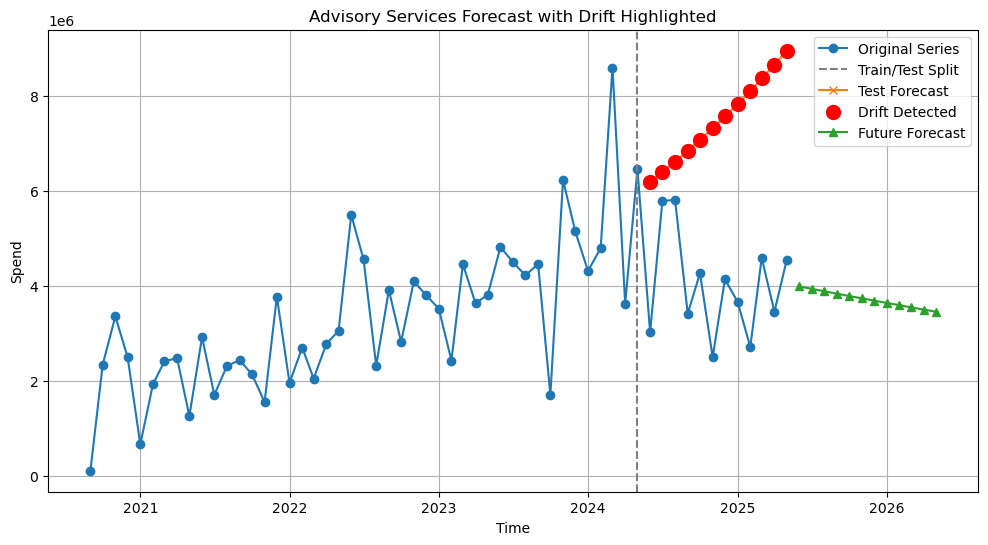

In [1039]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ==========================
# Functions (same as before)
# ==========================
def evaluate_forecast(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'MAPE': mape}

def detect_drift(test_mape, historical_mape, recent_mean_spend, historical_mean_spend,
                 error_drift_threshold=1.5, spend_drift_threshold=0.3):
    spend_relative_change = abs(recent_mean_spend - historical_mean_spend) / historical_mean_spend if historical_mean_spend != 0 else 0
    error_drift_flag = test_mape > (error_drift_threshold * historical_mape)
    spend_drift_flag = spend_relative_change > spend_drift_threshold
    drift_flag = error_drift_flag or spend_drift_flag
    return drift_flag, spend_relative_change

def fit_forecast_ets(ts, forecast_periods=12, test_size=12, log_transform=True,
                     error_drift_threshold=1.5, spend_drift_threshold=0.3):
    if log_transform:
        if (ts <= 0).any():
            raise ValueError("Log transform cannot be applied to non-positive values.")
        ts_log = np.log(ts)
    else:
        ts_log = ts.copy()
    
    train_log, test_log = ts_log[:-test_size], ts_log[-test_size:]
    train_orig, test_orig = ts[:-test_size], ts[-test_size:]
    
    hist_val_size = min(test_size, max(1, len(train_log) // 4))
    hist_train_log = train_log[:-hist_val_size]
    hist_val_log = train_log[-hist_val_size:]
    hist_train_orig = train_orig[:-hist_val_size]
    hist_val_orig = train_orig[-hist_val_size:]
    
    # Historical model
    model_hist = ExponentialSmoothing(hist_train_log, trend='add', seasonal=None, damped_trend=False)
    fit_hist = model_hist.fit(optimized=True)
    hist_val_pred_log = fit_hist.forecast(hist_val_size)
    hist_val_pred = np.exp(hist_val_pred_log) if log_transform else hist_val_pred_log
    historical_accuracy = evaluate_forecast(hist_val_orig, hist_val_pred)
    historical_mape = historical_accuracy['MAPE']
    
    # Test model
    model = ExponentialSmoothing(train_log, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(optimized=True)
    test_forecast_log = fit.forecast(test_size)
    test_forecast = np.exp(test_forecast_log) if log_transform else test_forecast_log
    test_accuracy = evaluate_forecast(test_orig, test_forecast)
    test_mape = test_accuracy['MAPE']
    
    # Drift detection
    historical_mean_spend = hist_train_orig.mean()
    recent_mean_spend = test_orig.mean()
    drift_flag, spend_relative_change = detect_drift(
        test_mape, historical_mape, recent_mean_spend, historical_mean_spend,
        error_drift_threshold, spend_drift_threshold
    )
    
    # Full forecast
    model_full = ExponentialSmoothing(ts_log, trend='add', seasonal=None, damped_trend=False)
    fit_full = model_full.fit(optimized=True)
    future_forecast_log = fit_full.forecast(forecast_periods)
    future_forecast = np.exp(future_forecast_log) if log_transform else future_forecast_log
    
    return test_accuracy, future_forecast, drift_flag, spend_relative_change, test_mape, historical_mape, test_forecast

def plot_forecast_with_drift(ts, train_size, test_forecast, future_forecast, drift_flag,
                             test_size=12, forecast_periods=12, title="Forecast Plot"):
    ts_index = ts.index if isinstance(ts, pd.Series) else np.arange(len(ts))
    
    plt.figure(figsize=(12,6))
    plt.plot(ts_index, ts, label='Original Series', marker='o')
    plt.axvline(x=ts_index[train_size-1], color='gray', linestyle='--', label='Train/Test Split')
    
    test_index = ts_index[train_size:train_size+test_size]
    plt.plot(test_index, test_forecast, label='Test Forecast', marker='x')
    
    if drift_flag:
        plt.scatter(test_index, test_forecast, color='red', s=100, label='Drift Detected', zorder=5)
    
    # Handle datetime index for future forecast
    if isinstance(ts_index, pd.DatetimeIndex):
        if ts_index.freq is None:
            freq = pd.infer_freq(ts_index)
        else:
            freq = ts_index.freq
        future_index = pd.date_range(start=ts_index[-1] + pd.tseries.frequencies.to_offset(freq),
                                     periods=forecast_periods, freq=freq)
    else:
        future_index = np.arange(ts_index[-1]+1, ts_index[-1]+1+forecast_periods)
    
    plt.plot(future_index, future_forecast, label='Future Forecast', marker='^')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()

# ==========================
# Run for all Level 1 categories
# ==========================
for category in df['Level 1 Category'].unique():
    print(f"\n=== Forecast for {category} ===")
    
    ts_category = (
        df[df['Level 1 Category'] == category]
          .groupby('YearMonth')['Invoice Amount']
          .sum()
          .sort_index()
    ).astype(float)
    
    # Ensure datetime index
    if not np.issubdtype(ts_category.index.dtype, np.datetime64):
        ts_category.index = pd.to_datetime(ts_category.index)
    
    # Run forecast pipeline
    test_accuracy, future_forecast, drift_flag, spend_relative_change, test_mape, historical_mape, test_forecast = fit_forecast_ets(
        ts_category,
        forecast_periods=12,
        test_size=12,
        log_transform=True
    )
    
    print("Drift Detected:", drift_flag)
    print("Spend Relative Change:", spend_relative_change)
    print("Test MAPE:", test_mape)
    print("Historical MAPE:", historical_mape)
    
    # Plot forecast
    plot_forecast_with_drift(ts_category, train_size=len(ts_category)-12, test_forecast=test_forecast,
                             future_forecast=future_forecast, drift_flag=drift_flag,
                             test_size=12, forecast_periods=12,
                             title=f"{category} Forecast with Drift Highlighted")


### H. Deployment and Dashboard

Below full pipeline will export CSV files with data relating to forecast, accuracy and drift results (when relevant) which will then be used as input to a power bi dashboard for business consumptions

[TotalSpend] CSVs saved to outputs/


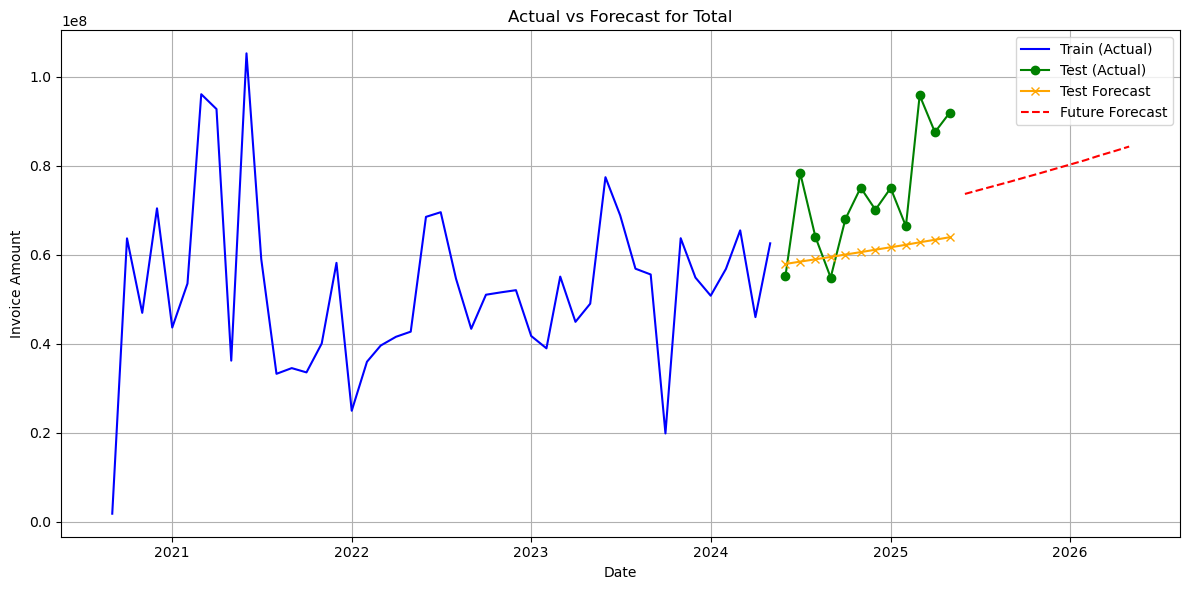

[L1Categories] CSVs saved to outputs/


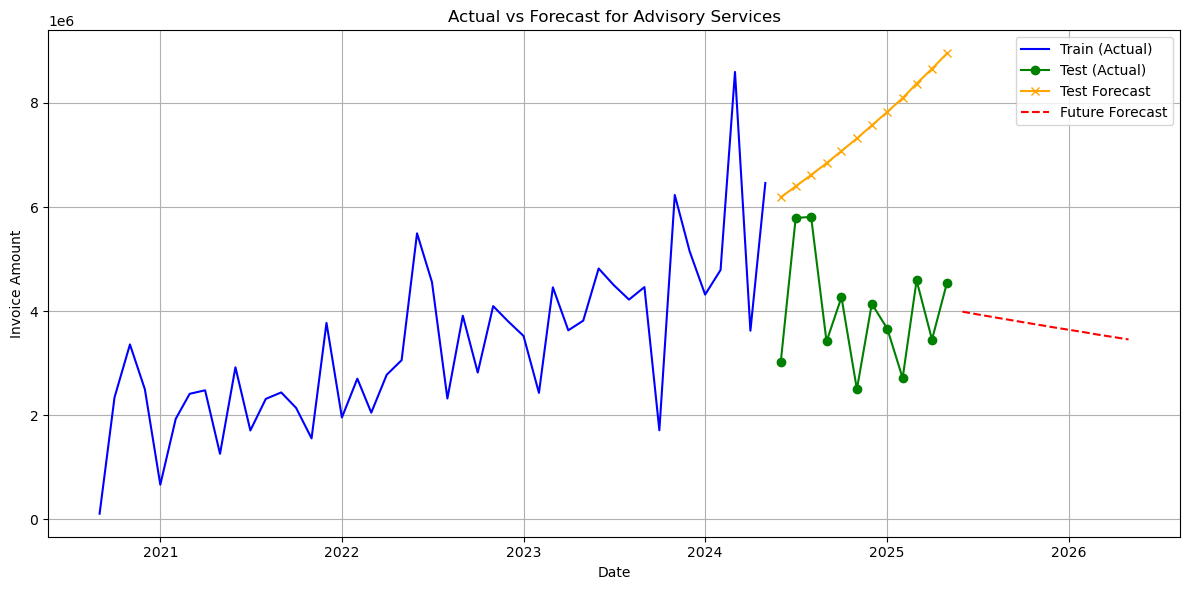

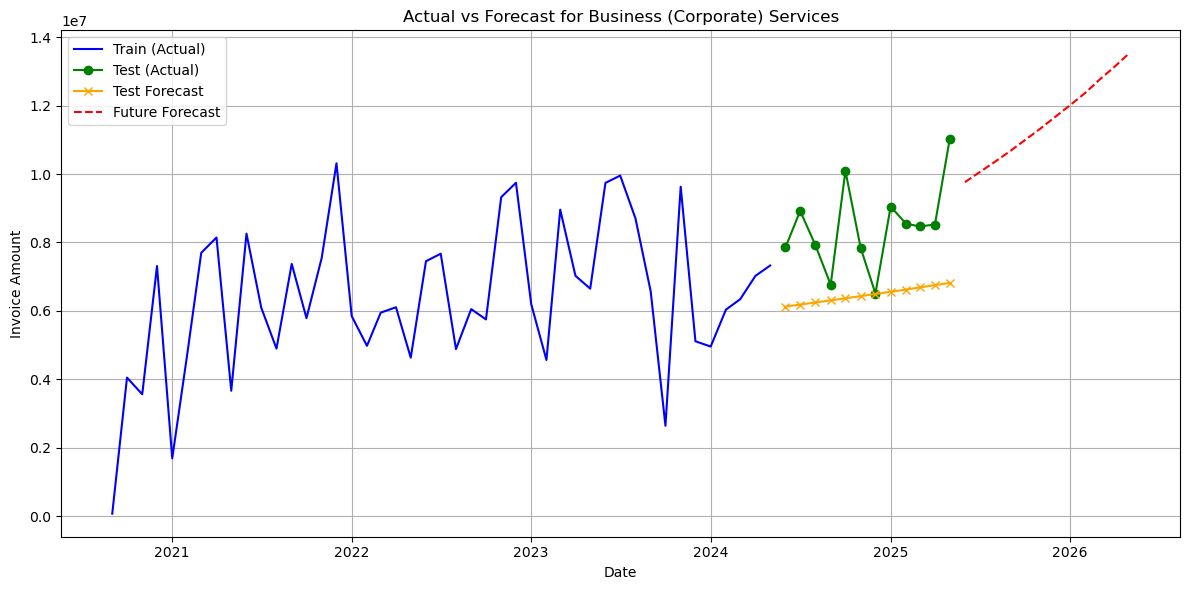

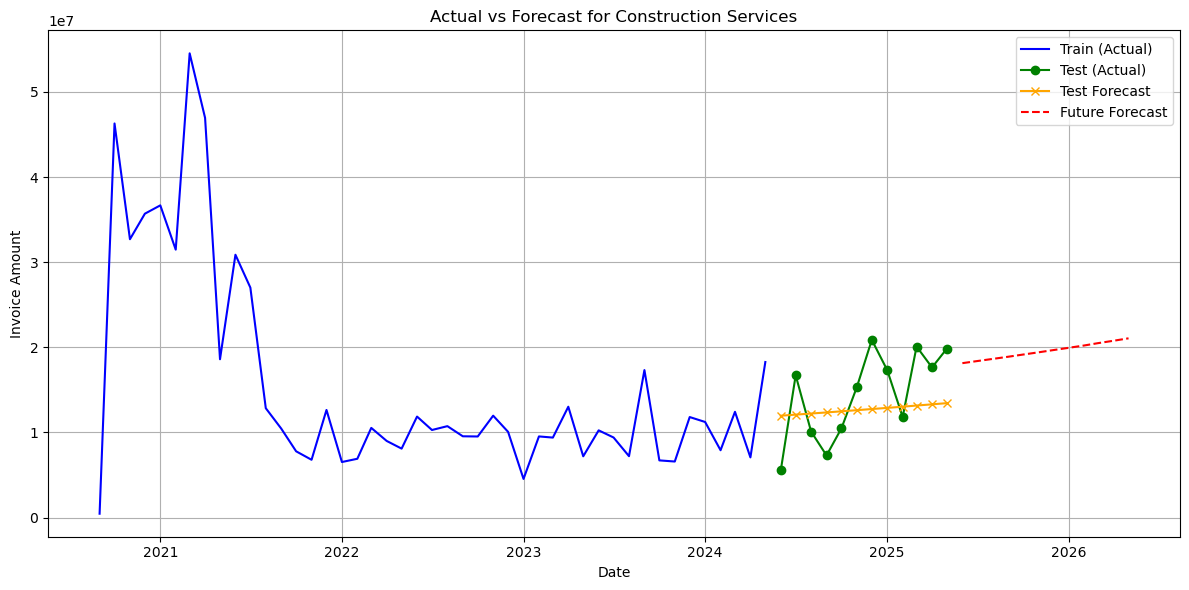

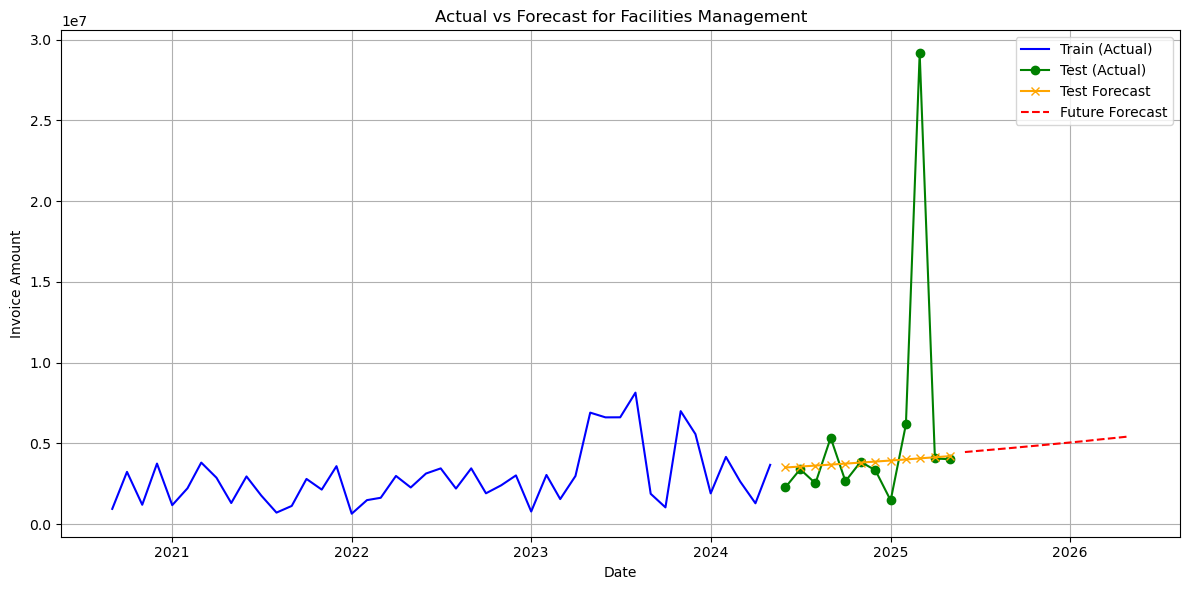

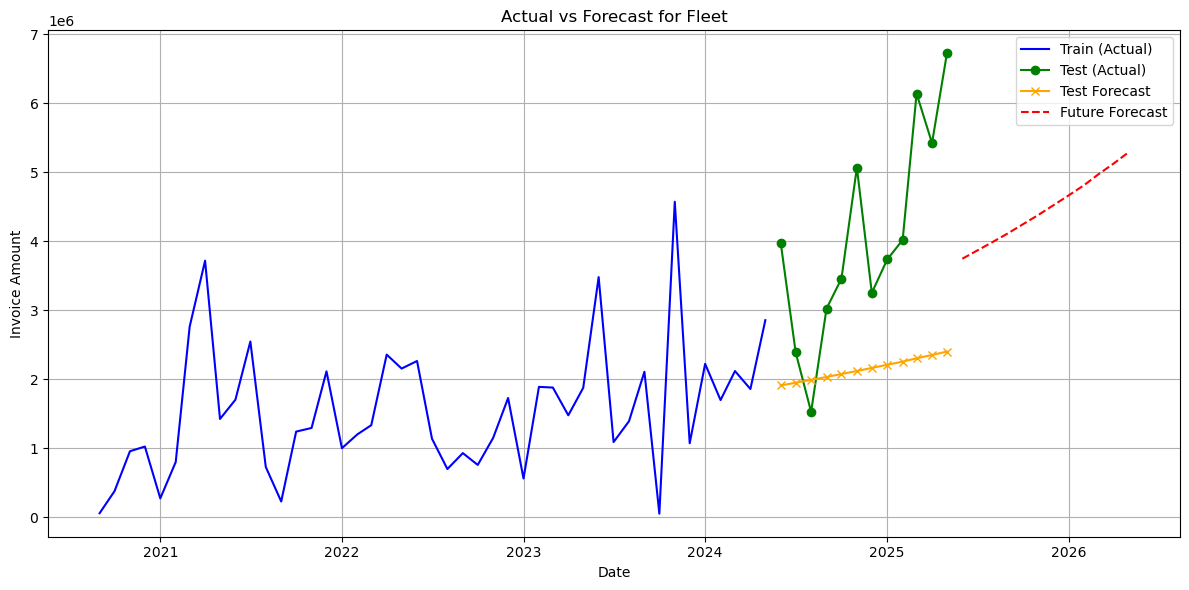

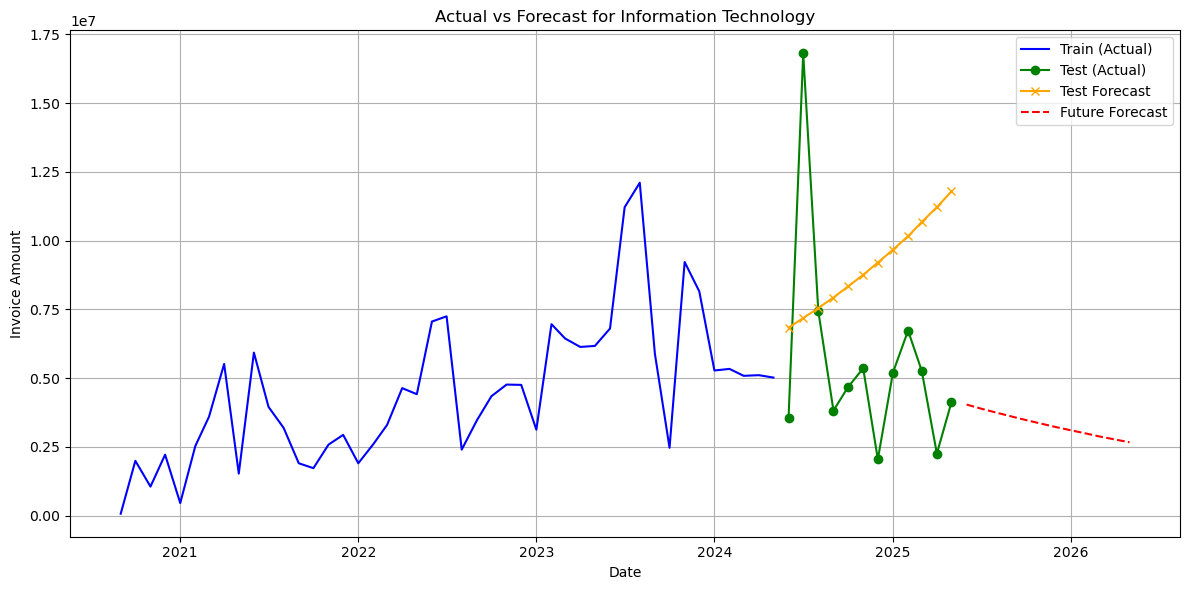

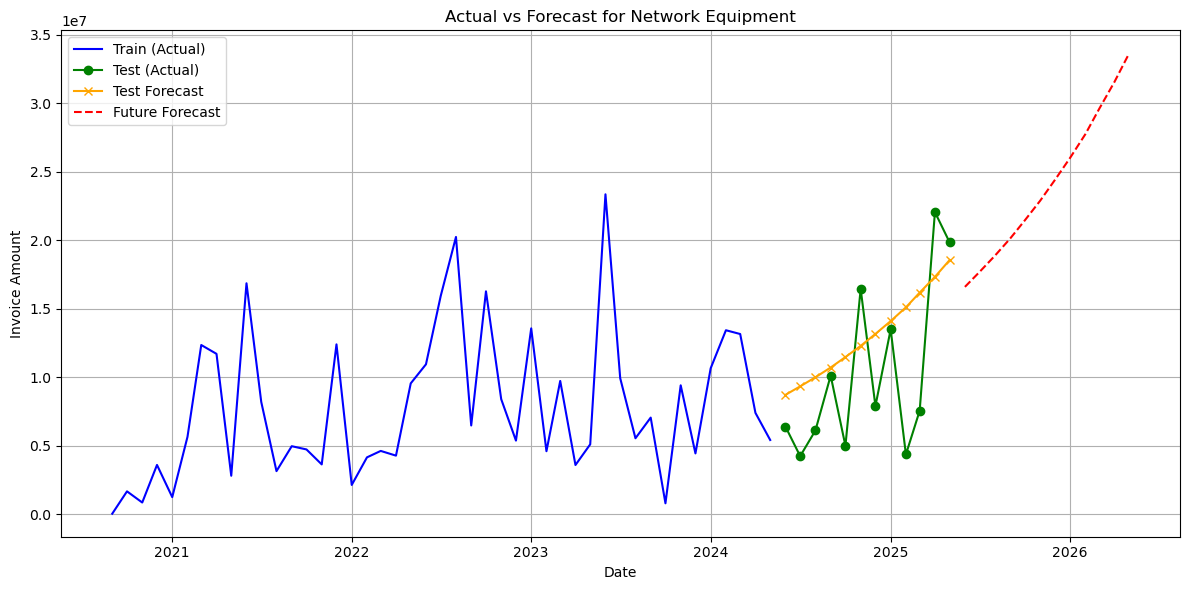

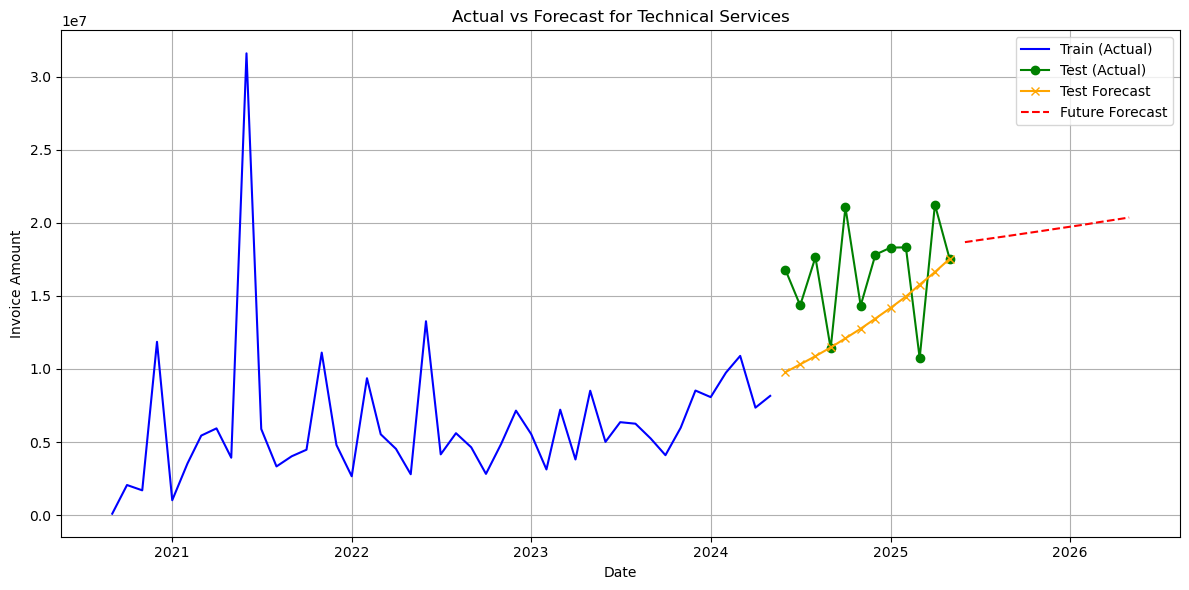

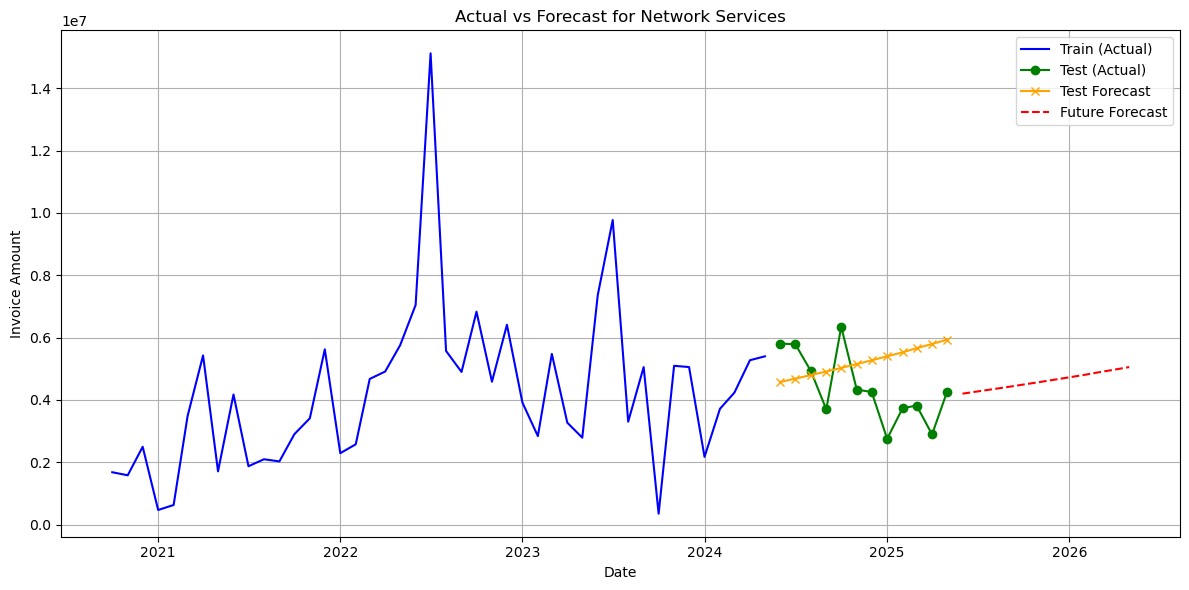

[Suppliers] CSVs saved to outputs/


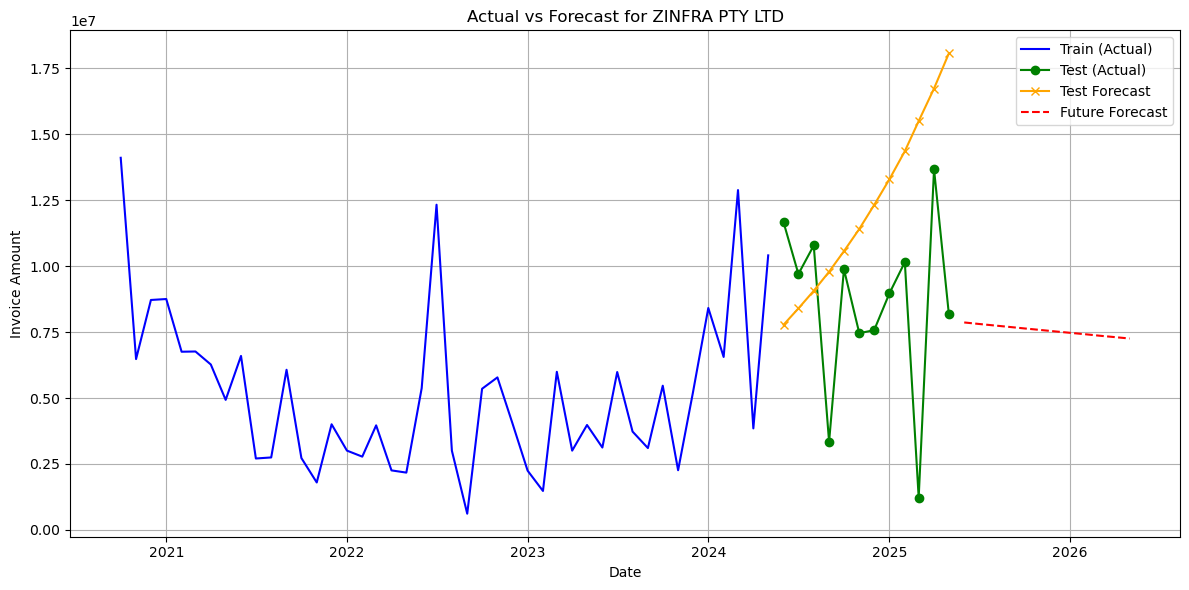

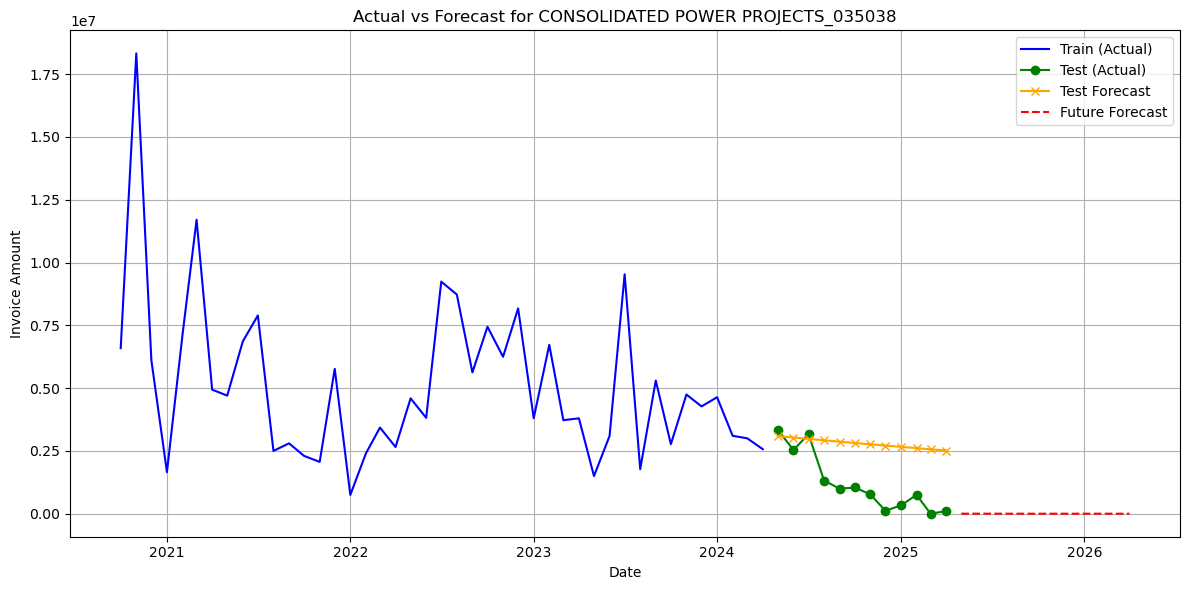

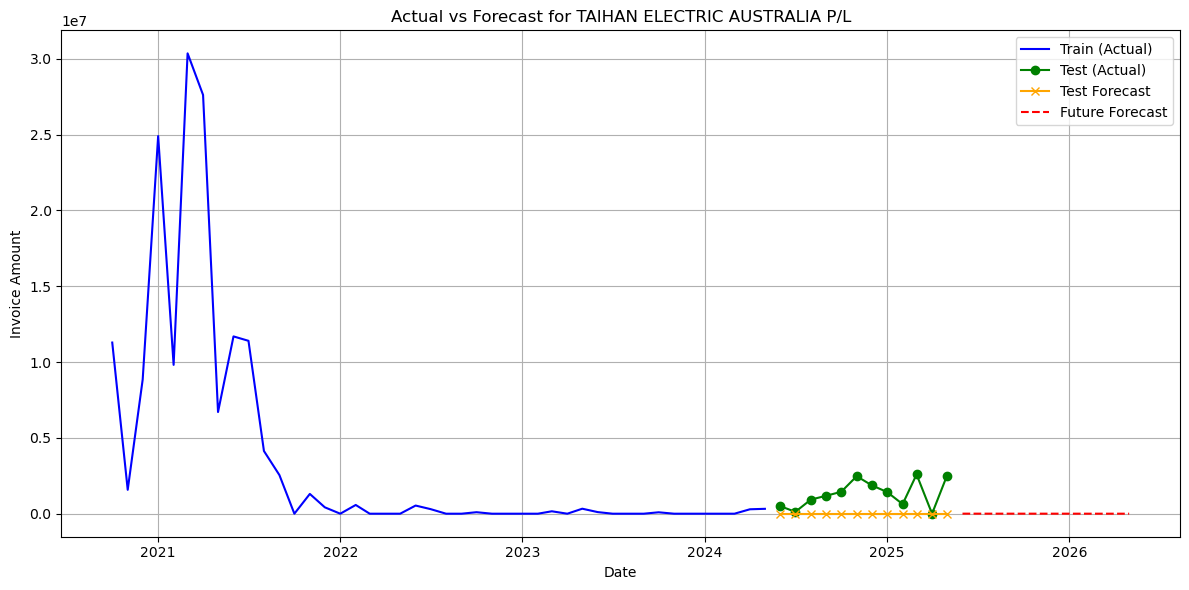

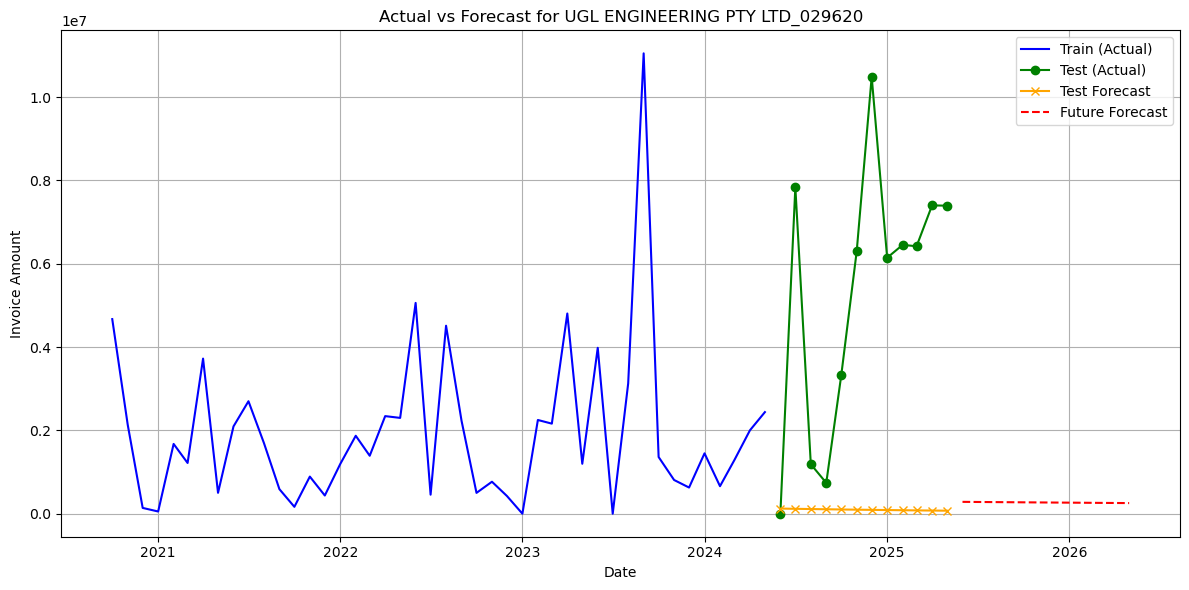

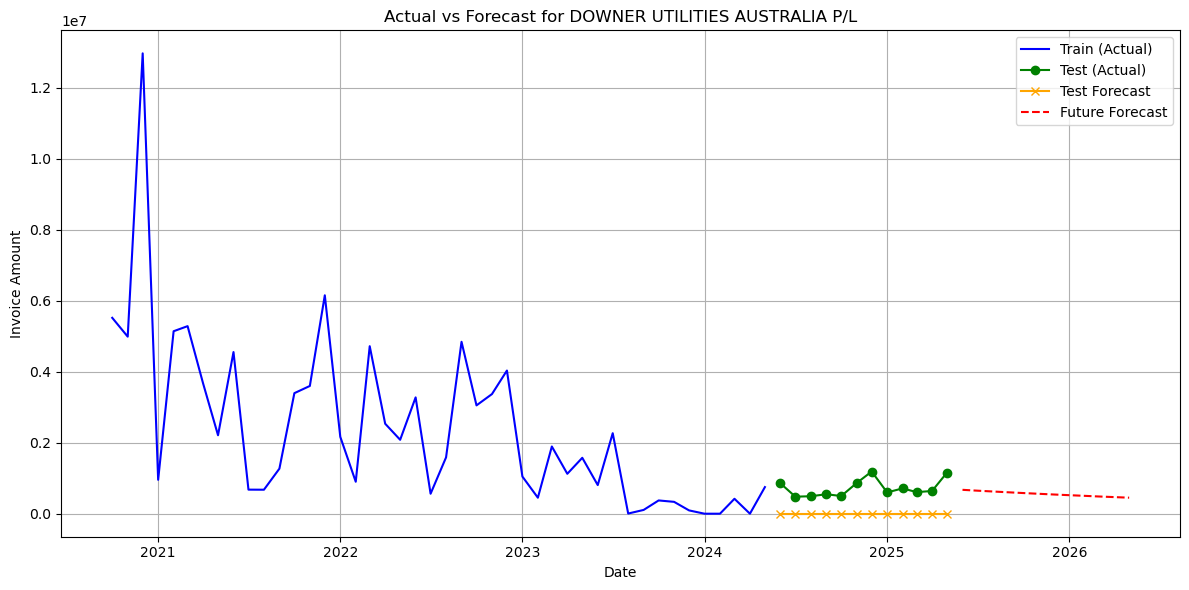

In [1041]:
# ==========================
# Imports
# ==========================
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ==========================
# Helper Functions
# ==========================
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

def detect_drift(test_mape, historical_mape, recent_mean, historical_mean,
                 error_drift_threshold=1.5, spend_drift_threshold=0.3):
    spend_relative_change = abs(recent_mean - historical_mean) / (historical_mean if historical_mean != 0 else 1)
    error_drift_flag = test_mape > (error_drift_threshold * historical_mape)
    spend_drift_flag = spend_relative_change > spend_drift_threshold
    drift_flag = error_drift_flag or spend_drift_flag
    return drift_flag, spend_relative_change

# ==========================
# Forecasting Function
# ==========================
def fit_forecast_ets(ts, forecast_periods=12, test_size=12, log_transform=True,
                     error_drift_threshold=1.5, spend_drift_threshold=0.3):
    # Fill NaNs and ensure datetime index
    ts = ts.asfreq('MS')  # fill missing months
    ts = ts.fillna(0)     # replace NaNs with 0

    # Log-transform safe
    if log_transform:
        ts_log = np.log(ts.clip(lower=1e-6))
    else:
        ts_log = ts.copy()
    
    train_log, test_log = ts_log[:-test_size], ts_log[-test_size:]
    train_orig, test_orig = ts[:-test_size], ts[-test_size:]

    # Fit ETS model
    model = ExponentialSmoothing(train_log, trend='add', seasonal=None, damped_trend=False)
    fit = model.fit(optimized=True)

    # Test forecast aligned to test index
    test_forecast_log = fit.forecast(test_size)
    test_forecast = pd.Series(np.exp(test_forecast_log) if log_transform else test_forecast_log,
                              index=test_orig.index)

    # Accuracy
    accuracy = evaluate_forecast(test_orig, test_forecast)

    # Drift
    drift_flag, spend_relative_change = detect_drift(
        test_mape=accuracy['MAPE'],
        historical_mape=accuracy['MAPE'],  # simple version
        recent_mean=test_orig.mean(),
        historical_mean=train_orig.mean(),
        error_drift_threshold=error_drift_threshold,
        spend_drift_threshold=spend_drift_threshold
    )
    accuracy['DriftFlag'] = drift_flag
    accuracy['SpendRelativeChange'] = spend_relative_change

    # Future forecast
    model_full = ExponentialSmoothing(ts_log, trend='add', seasonal=None, damped_trend=False)
    fit_full = model_full.fit(optimized=True)
    future_forecast_log = fit_full.forecast(forecast_periods)
    future_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1),
                                 periods=forecast_periods, freq='MS')
    future_forecast = pd.Series(np.exp(future_forecast_log) if log_transform else future_forecast_log,
                                index=future_index)

    return accuracy, test_forecast, future_forecast

# ==========================
# Group Forecasting
# ==========================
def forecast_on_groups(df, group_col, value_col='Invoice Amount', forecast_periods=12, test_size=12,
                       top_n=None, log_transform=True, date_col='YearMonth'):
    results, accuracies = [], []

    if group_col is None:
        ts = df.groupby(date_col)[value_col].sum().sort_index()
        accuracy, test_forecast, future_forecast = fit_forecast_ets(ts, forecast_periods, test_size, log_transform)
        results.append({'Group': 'Total', 'Forecast': future_forecast, 'TestForecast': test_forecast, 'Metrics': accuracy})
        accuracies.append({'Group': 'Total', **accuracy})
    else:
        groups = df.groupby(group_col)[value_col].sum().nlargest(top_n).index if top_n else df[group_col].unique()
        for group in groups:
            ts = df[df[group_col]==group].groupby(date_col)[value_col].sum().sort_index()
            ts = ts.asfreq('MS').fillna(0)  # fill missing months/NaNs
            if len(ts) < (test_size + 1):
                continue
            accuracy, test_forecast, future_forecast = fit_forecast_ets(ts, forecast_periods, test_size, log_transform)
            results.append({'Group': group, 'Forecast': future_forecast, 'TestForecast': test_forecast, 'Metrics': accuracy})
            accuracies.append({'Group': group, **accuracy})

    accuracy_df = pd.DataFrame(accuracies)
    return results, accuracy_df

# ==========================
# Export to CSV
# ==========================
def save_forecast_results(results, df, group_name, group_col=None, value_col='Invoice Amount',
                          test_size=12, output_dir='outputs'):
    os.makedirs(output_dir, exist_ok=True)
    accuracy_records, actual_records, forecast_records = [], [], []

    for item in results:
        group = item['Group']
        future_forecast = item['Forecast']
        test_forecast = item['TestForecast']
        metrics = item['Metrics']

        # Accuracy + drift
        accuracy_records.append({'Group': group, **metrics})

        # Actuals + Test forecast
        if group_col is None or group=='Total':
            ts = df.groupby('YearMonth')[value_col].sum().sort_index()
        else:
            ts = df[df[group_col]==group].groupby('YearMonth')[value_col].sum().sort_index()
        ts = ts.asfreq('MS').fillna(0)
        ts.index = pd.to_datetime(ts.index)

        # Align test forecast
        test_forecast_aligned = test_forecast.reindex(ts[-test_size:].index)

        for idx, val in ts.items():
            actual_records.append({
                'Group': group,
                'Date': idx,
                'Actual': val,
                'TestForecast': test_forecast_aligned.get(idx, np.nan),
                'DataType': 'Train' if idx not in ts[-test_size:].index else 'Test'
            })

        # Future forecast
        for idx, val in future_forecast.items():
            forecast_records.append({'Group': group, 'Date': idx, 'Forecast': val, 'DataType': 'Forecast'})

    pd.DataFrame(accuracy_records).to_csv(os.path.join(output_dir,f"{group_name}_accuracy.csv"), index=False)
    pd.DataFrame(actual_records).to_csv(os.path.join(output_dir,f"{group_name}_actuals.csv"), index=False)
    pd.DataFrame(forecast_records).to_csv(os.path.join(output_dir,f"{group_name}_forecasts.csv"), index=False)
    print(f"[{group_name}] CSVs saved to {output_dir}/")

# ==========================
# Plotting Function
# ==========================
def plot_actual_vs_forecast(df, results, group_col=None, value_col='Invoice Amount',
                            test_size=12, top_n=None):
    groups_to_plot = results if top_n is None else results[:top_n]

    for item in groups_to_plot:
        group = item['Group']
        test_forecast = item['TestForecast']
        future_forecast = item['Forecast']

        # Historical actuals
        if group_col is None or group=='Total':
            ts = df.groupby('YearMonth')[value_col].sum().sort_index()
        else:
            ts = df[df[group_col]==group].groupby('YearMonth')[value_col].sum().sort_index()
        ts = ts.asfreq('MS').fillna(0)
        ts.index = pd.to_datetime(ts.index)

        train = ts[:-test_size]
        test = ts[-test_size:]

        # Align test forecast
        test_forecast_aligned = test_forecast.reindex(test.index)

        # Plot
        future_index = future_forecast.index
        plt.figure(figsize=(12,6))
        plt.plot(train.index, train.values, label='Train (Actual)', color='blue')
        plt.plot(test.index, test.values, label='Test (Actual)', color='green', marker='o')
        plt.plot(test_forecast_aligned.index, test_forecast_aligned.values, label='Test Forecast', color='orange', marker='x')
        plt.plot(future_index, future_forecast.values, label='Future Forecast', color='red', linestyle='--')
        plt.title(f"Actual vs Forecast for {group}")
        plt.xlabel('Date')
        plt.ylabel(value_col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ==========================
# ==== USAGE EXAMPLES ====
# ==========================
# 1) Total Spend
total_results, total_accuracy = forecast_on_groups(monthly_total, group_col=None)
save_forecast_results(total_results, monthly_total, group_name="TotalSpend")
plot_actual_vs_forecast(monthly_total, total_results, group_col=None)

# 2) All L1 Categories
l1_results, l1_accuracy = forecast_on_groups(monthly_l1, group_col="Level 1 Category")
save_forecast_results(l1_results, monthly_l1, group_name="L1Categories", group_col="Level 1 Category")
plot_actual_vs_forecast(monthly_l1, l1_results, group_col="Level 1 Category")

# 3) Top 20 Suppliers
supplier_results, supplier_accuracy = forecast_on_groups(monthly_supplier, group_col="Supplier Name", top_n=20)
save_forecast_results(supplier_results, monthly_supplier, group_name="Suppliers", group_col="Supplier Name")
plot_actual_vs_forecast(monthly_supplier, supplier_results, group_col="Supplier Name", top_n=5)


Future Work 
- Fine-tune Forecasting Pipeline: Continue refining the current forecasting pipeline to improve accuracy and robustness.
- Hybrid Forecasting Approaches: Explore hybrid models that combine statistical forecasting methods with machine learning techniques.
- Full End-to-End Pipeline: Integrate invoice classification models with the forecasting pipeline to build a comprehensive spend analytics solution.
- Granular Forecasting: Extend forecasting to more detailed spend categories and supplier groupings for deeper insights.
- Domain Knowledge Integration: Incorporate business and stakeholder input to adjust for known one-off events and seasonalities that may distort forecasts.
- Power BI Dashboard Creation and Deployment Options: Evaluate alternative deployment methods (e.g., dashboards, applications) in line with company policies and requirements.


--------------------------------------------------